**Pytorch Primer**

- Introduction to tensors
- Simple tensor operations
- Gradient Computations
- Doing gradient descent using pytorch
- Write a simple linear regression
- Write a logistic classifier
- Write an MLP

Pytorch Tensors are just like Numpy Arrays but they can be accelerated using GPU. Just like numpy arrays they also support matrix algebra operations, apart from that, these tensors support the abilty to compute gradients on the fly, so implimenting gradient descent operations is very straight forward as one doesn't have to compute  gradients using analytical solutions.

First we will see how the tensors behave particularly their behaviour with regards to gradient computation. We will see how to do gradient descent on polynomials, write linear regressor, logistic classifier and an MLP.

In [1]:
import torch
## Torch base class will help in creating tensors, tensors help in representing training 
## data as well as model parameters, these are the primitive datatypes that pytorch uses
data1=torch.tensor([12,34,56],dtype=torch.float)

In [2]:
data1.size()

torch.Size([3])

In [3]:
data2=torch.tensor(([32,45,56],[56,67,78]),dtype=torch.float)

In [4]:
data2

tensor([[32., 45., 56.],
        [56., 67., 78.]])

In [5]:
data2.size()

torch.Size([2, 3])

In [6]:
type(data2.size())

torch.Size

In [7]:
print(f'The size of data1 is {data1.size()}')

The size of data1 is torch.Size([3])


In [8]:
### Many time we may want to interact with pytorch elements and execute some arbitrary code, for that we may need to convert the torch objects to regular python objects
data1.size()[0]

3

In [9]:
data2.size()[0]

2

In [10]:
type(data2.size()[0])

int

In [11]:
### Sometimes we may need to add dimensions or remove dimensions from a tensor, sqeeze() and unsqueeze() methods come in handy there
data2.unsqueeze(0)

tensor([[[32., 45., 56.],
         [56., 67., 78.]]])

In [12]:
data2.unsqueeze(0).size()

torch.Size([1, 2, 3])

In [13]:
data2.squeeze(0).squeeze(0).size()

torch.Size([2, 3])

In [14]:
### We can also index these tensors in a manner very similar to numpy arrays
data2[0,]

tensor([32., 45., 56.])

In [15]:
data2[0,1]

tensor(45.)

In [16]:
data2[0,[0,1]]

tensor([32., 45.])

In [17]:
data2[0,0:2]

tensor([32., 45.])

In [18]:
data2[0,0:2].tolist()

[32.0, 45.0]

In [19]:
data2[0,0:2].numpy()

array([32., 45.], dtype=float32)

In [20]:
data2[0,1].item()

45.0

In [21]:
#### We can create tensors of zeros, ones and filled with random numbers.
torch.rand(2,3)

tensor([[0.2550, 0.4493, 0.4206],
        [0.9682, 0.6712, 0.5070]])

In [22]:
torch.randn((3,16,16))

tensor([[[-1.9706e+00,  5.4347e-01, -9.3301e-01,  1.1585e-02, -2.1092e-01,
          -2.8636e-01, -4.3048e-01, -7.7243e-01,  1.0074e+00,  2.6563e-02,
          -1.7835e-01,  5.0962e-01, -9.2152e-01,  3.1352e-01,  5.9287e-01,
          -9.9271e-01],
         [ 3.5445e-01, -4.5338e-01,  1.1851e+00, -4.7767e-02,  9.5983e-02,
           4.7104e-01,  6.2098e-03,  5.8078e-01, -5.7278e-01, -1.2683e+00,
           9.5227e-01, -1.0499e+00,  1.0286e+00,  2.0051e-01, -3.4999e-01,
           1.6797e+00],
         [ 1.0216e+00, -9.3826e-01,  1.7736e+00, -7.0998e-01, -1.6478e+00,
          -1.0165e+00, -1.5938e+00,  4.6973e-01,  7.2446e-01, -6.7441e-01,
           1.3860e+00,  9.3168e-01,  2.7636e-01,  1.0726e+00, -2.0641e-01,
           1.4069e+00],
         [ 1.7036e+00,  1.4027e+00,  6.6465e-01, -8.3085e-01, -3.8858e-01,
          -7.2094e-01, -1.2111e+00,  1.1046e+00, -3.3502e-01,  1.1410e+00,
          -4.3375e-01, -2.2293e-01,  1.7995e-01, -3.2397e-01, -3.9472e-01,
          -2.3414e+00],
    

In [23]:
torch.empty(3,3)

tensor([[9.8091e-45, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [24]:
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [25]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Let's now see how we can impliment gradient descent using pytorch on a simple polynomial

Imagine we wanted to minimize the following expression:
$x^2+4x-18$

We can do this using gradient descent. First let's create a simple computation graph

In [26]:
x=torch.tensor([0.0],requires_grad=True)

In [27]:
z=x**2+4*x-18

In [28]:
z.backward()

In [29]:
z.grad

In [30]:
x.grad ### 2x+4 at x=0

tensor([4.])

In [31]:
z=x**2+4*x-18

In [32]:
z.backward()

In [33]:
x.grad # What is going on? https://pytorch.org/docs/stable/autograd.html .grad is 
       # actually just the sum of gradients

tensor([8.])

In [34]:
x.grad.zero_() 

tensor([0.])

In [35]:
x.grad  # We need to manually "zero" the gradients

tensor([0.])

In [36]:
#### Let's impliment the gradient descent ####
x=torch.tensor([0.0],requires_grad=True)

In [37]:
lr=0.01
for i in range(2):
    z=x**2+4*x-18
    z.backward()
    print(z.item(),x.grad.item(),x.item())
  #  x-=lr*x.grad we don't want to include the weight update step in the gradient computation so while updating we turn off grad tracking
  # x.grad.zero_()
    with torch.no_grad():
        x-=lr*x.grad
    x.grad.zero_()

-18.0 4.0 0.0
-18.15839958190918 3.9200000762939453 -0.03999999910593033


Now we can attempt to build our own regression model using pytoch, let's first load our data and create simple mechanics to build a regressor.

In [38]:
import pandas as pd
reg_d=pd.read_csv("data/regression.csv")

In [39]:
reg_d.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0


In [40]:
y=reg_d['mpg'].values
X=reg_d[['cylinders']].values

In [41]:
y=torch.tensor(y)
X=torch.tensor(X)

In [42]:
X.shape

torch.Size([398, 1])

In [43]:
W=torch.randn(1,1)
b=torch.randn(1,)

In [44]:
pred=torch.matmul(X.float(),W)+b

In [45]:
pred.shape

torch.Size([398, 1])

In [46]:
diff=pred-y.reshape(398,1)

In [47]:
diff.shape

torch.Size([398, 1])

In [48]:
loss=torch.sum(diff*diff)/diff.shape[0]

In [49]:
loss

tensor(951.7673, dtype=torch.float64)

In [50]:
####### Let's setup the linear regression model #####
X=reg_d[['cylinders']].values
y=reg_d['mpg'].values
y=torch.tensor(y,dtype=torch.float)
X=torch.tensor(X)
W=torch.randn((1,1),requires_grad=True)
b=torch.randn((1,),requires_grad=True)
lr1=0.01
lr2=0.01
Losses=[]
for i in range(1000):
    pred=torch.matmul(X.float(),W)+b
    diff=pred-y.reshape(398,1)
    loss=torch.sum(diff*diff)/diff.shape[0]
    loss.backward()
    Losses.append(loss.item())
    print(f"Iteration {i+1}, loss {round(loss.item(),2)}, W ={round(W.item(),2)}, b = {round(b.item(),2)}")
    with torch.no_grad():
        b-=(lr1/398)*b.grad
        W-=(lr2/398)*W.grad
        W.grad.zero_()
        b.grad.zero_()

Iteration 1, loss 672.07, W =-0.36, b = 0.63
Iteration 2, loss 670.4, W =-0.36, b = 0.63
Iteration 3, loss 668.74, W =-0.35, b = 0.63
Iteration 4, loss 667.09, W =-0.34, b = 0.63
Iteration 5, loss 665.44, W =-0.34, b = 0.63
Iteration 6, loss 663.8, W =-0.33, b = 0.63
Iteration 7, loss 662.16, W =-0.32, b = 0.63
Iteration 8, loss 660.52, W =-0.32, b = 0.64
Iteration 9, loss 658.9, W =-0.31, b = 0.64
Iteration 10, loss 657.28, W =-0.31, b = 0.64
Iteration 11, loss 655.66, W =-0.3, b = 0.64
Iteration 12, loss 654.05, W =-0.29, b = 0.64
Iteration 13, loss 652.44, W =-0.29, b = 0.64
Iteration 14, loss 650.84, W =-0.28, b = 0.64
Iteration 15, loss 649.25, W =-0.27, b = 0.64
Iteration 16, loss 647.66, W =-0.27, b = 0.64
Iteration 17, loss 646.07, W =-0.26, b = 0.65
Iteration 18, loss 644.5, W =-0.26, b = 0.65
Iteration 19, loss 642.92, W =-0.25, b = 0.65
Iteration 20, loss 641.35, W =-0.24, b = 0.65
Iteration 21, loss 639.79, W =-0.24, b = 0.65
Iteration 22, loss 638.23, W =-0.23, b = 0.65
It

Iteration 274, loss 374.24, W =1.03, b = 0.91
Iteration 275, loss 373.58, W =1.03, b = 0.91
Iteration 276, loss 372.92, W =1.03, b = 0.91
Iteration 277, loss 372.26, W =1.04, b = 0.91
Iteration 278, loss 371.6, W =1.04, b = 0.91
Iteration 279, loss 370.95, W =1.05, b = 0.91
Iteration 280, loss 370.29, W =1.05, b = 0.91
Iteration 281, loss 369.64, W =1.05, b = 0.92
Iteration 282, loss 369.0, W =1.06, b = 0.92
Iteration 283, loss 368.35, W =1.06, b = 0.92
Iteration 284, loss 367.71, W =1.07, b = 0.92
Iteration 285, loss 367.06, W =1.07, b = 0.92
Iteration 286, loss 366.42, W =1.07, b = 0.92
Iteration 287, loss 365.79, W =1.08, b = 0.92
Iteration 288, loss 365.15, W =1.08, b = 0.92
Iteration 289, loss 364.52, W =1.09, b = 0.92
Iteration 290, loss 363.89, W =1.09, b = 0.92
Iteration 291, loss 363.26, W =1.09, b = 0.92
Iteration 292, loss 362.63, W =1.1, b = 0.92
Iteration 293, loss 362.01, W =1.1, b = 0.93
Iteration 294, loss 361.38, W =1.11, b = 0.93
Iteration 295, loss 360.76, W =1.11, b

Iteration 575, loss 248.41, W =1.97, b = 1.12
Iteration 576, loss 248.17, W =1.97, b = 1.12
Iteration 577, loss 247.93, W =1.97, b = 1.12
Iteration 578, loss 247.69, W =1.98, b = 1.12
Iteration 579, loss 247.45, W =1.98, b = 1.13
Iteration 580, loss 247.22, W =1.98, b = 1.13
Iteration 581, loss 246.98, W =1.98, b = 1.13
Iteration 582, loss 246.74, W =1.99, b = 1.13
Iteration 583, loss 246.51, W =1.99, b = 1.13
Iteration 584, loss 246.27, W =1.99, b = 1.13
Iteration 585, loss 246.04, W =1.99, b = 1.13
Iteration 586, loss 245.8, W =1.99, b = 1.13
Iteration 587, loss 245.57, W =2.0, b = 1.13
Iteration 588, loss 245.34, W =2.0, b = 1.13
Iteration 589, loss 245.11, W =2.0, b = 1.13
Iteration 590, loss 244.88, W =2.0, b = 1.13
Iteration 591, loss 244.65, W =2.01, b = 1.13
Iteration 592, loss 244.42, W =2.01, b = 1.13
Iteration 593, loss 244.19, W =2.01, b = 1.13
Iteration 594, loss 243.97, W =2.01, b = 1.13
Iteration 595, loss 243.74, W =2.02, b = 1.13
Iteration 596, loss 243.51, W =2.02, b 

Iteration 778, loss 212.84, W =2.38, b = 1.23
Iteration 779, loss 212.71, W =2.38, b = 1.23
Iteration 780, loss 212.59, W =2.38, b = 1.23
Iteration 781, loss 212.47, W =2.38, b = 1.23
Iteration 782, loss 212.35, W =2.39, b = 1.23
Iteration 783, loss 212.23, W =2.39, b = 1.23
Iteration 784, loss 212.11, W =2.39, b = 1.23
Iteration 785, loss 211.99, W =2.39, b = 1.23
Iteration 786, loss 211.87, W =2.39, b = 1.23
Iteration 787, loss 211.75, W =2.39, b = 1.23
Iteration 788, loss 211.63, W =2.4, b = 1.23
Iteration 789, loss 211.51, W =2.4, b = 1.23
Iteration 790, loss 211.4, W =2.4, b = 1.23
Iteration 791, loss 211.28, W =2.4, b = 1.24
Iteration 792, loss 211.16, W =2.4, b = 1.24
Iteration 793, loss 211.04, W =2.4, b = 1.24
Iteration 794, loss 210.93, W =2.41, b = 1.24
Iteration 795, loss 210.81, W =2.41, b = 1.24
Iteration 796, loss 210.7, W =2.41, b = 1.24
Iteration 797, loss 210.58, W =2.41, b = 1.24
Iteration 798, loss 210.47, W =2.41, b = 1.24
Iteration 799, loss 210.35, W =2.41, b = 1

Iteration 966, loss 195.73, W =2.65, b = 1.31
Iteration 967, loss 195.66, W =2.65, b = 1.31
Iteration 968, loss 195.6, W =2.65, b = 1.31
Iteration 969, loss 195.53, W =2.65, b = 1.31
Iteration 970, loss 195.47, W =2.66, b = 1.31
Iteration 971, loss 195.41, W =2.66, b = 1.31
Iteration 972, loss 195.34, W =2.66, b = 1.31
Iteration 973, loss 195.28, W =2.66, b = 1.31
Iteration 974, loss 195.21, W =2.66, b = 1.31
Iteration 975, loss 195.15, W =2.66, b = 1.31
Iteration 976, loss 195.09, W =2.66, b = 1.31
Iteration 977, loss 195.02, W =2.66, b = 1.31
Iteration 978, loss 194.96, W =2.67, b = 1.31
Iteration 979, loss 194.9, W =2.67, b = 1.31
Iteration 980, loss 194.83, W =2.67, b = 1.31
Iteration 981, loss 194.77, W =2.67, b = 1.32
Iteration 982, loss 194.71, W =2.67, b = 1.32
Iteration 983, loss 194.65, W =2.67, b = 1.32
Iteration 984, loss 194.59, W =2.67, b = 1.32
Iteration 985, loss 194.52, W =2.67, b = 1.32
Iteration 986, loss 194.46, W =2.67, b = 1.32
Iteration 987, loss 194.4, W =2.68, 

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

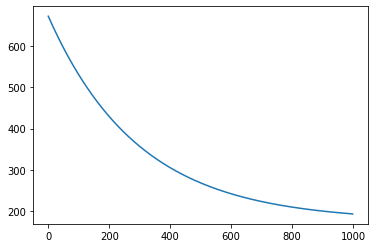

In [52]:
plt.plot(range(len(Losses)),Losses)

In [53]:
###### Logistic Regressor #######
log_d=pd.read_csv("data/classification.csv")
log_d.head(2)

,No_pregnant,Plasma_glucose,Blood_pres,Skin_thick,Serum_insu,BMI,Diabetes_func,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [54]:
### We can start first by creating a sigmoid and then defining log_loss
X=log_d[['No_pregnant']].values
y=log_d['Class'].values
X=torch.tensor(X,dtype=torch.float)
y=torch.tensor(y,dtype=torch.float)

In [55]:
W=torch.randn((1,1),dtype=torch.float)
b=torch.randn((1,),dtype=torch.float)

In [56]:
z=torch.mm(X,W)+b

In [57]:
p=1.0/(1+torch.exp(-z))

In [58]:
loss=-(y.reshape(768,1)*torch.log(p)+(1-y.reshape(768,1))*torch.log(1-p)).mean()

In [59]:
X=log_d[['No_pregnant']].values
y=log_d['Class'].values
X=torch.tensor(X,dtype=torch.float)
y=torch.tensor(y,dtype=torch.float)
W=torch.randn((1,1),dtype=torch.float,requires_grad=True)
b=torch.randn((1,),dtype=torch.float,requires_grad=True)
lr=0.1
Loss=[]
for i in range(100):
    z=torch.mm(X,W)+b
    p=1.0/(1+torch.exp(-z+0.001))
    loss=-(y.reshape(768,1)*torch.log(p+0.001)+(1-y.reshape(768,1))*torch.log(1-p+0.001)).mean()
    Loss.append(loss.item())
    print(f"Iteration {i+1}, loss {round(loss.item(),2)}, W ={round(W.item(),2)}, b = {round(b.item(),2)}")
    loss.backward()
    with torch.no_grad():
        b-=lr*b.grad
        W-=lr*W.grad
        b.grad.zero_()
        W.grad.zero_()

Iteration 1, loss 1.53, W =-0.89, b = -0.37
Iteration 2, loss 1.47, W =-0.82, b = -0.36
Iteration 3, loss 1.4, W =-0.73, b = -0.34
Iteration 4, loss 1.31, W =-0.64, b = -0.33
Iteration 5, loss 1.18, W =-0.53, b = -0.31
Iteration 6, loss 1.03, W =-0.41, b = -0.3
Iteration 7, loss 0.87, W =-0.29, b = -0.28
Iteration 8, loss 0.74, W =-0.17, b = -0.27
Iteration 9, loss 0.68, W =-0.08, b = -0.27
Iteration 10, loss 0.66, W =-0.03, b = -0.27
Iteration 11, loss 0.66, W =-0.01, b = -0.27
Iteration 12, loss 0.66, W =0.0, b = -0.28
Iteration 13, loss 0.66, W =0.0, b = -0.29
Iteration 14, loss 0.66, W =0.01, b = -0.3
Iteration 15, loss 0.66, W =0.01, b = -0.31
Iteration 16, loss 0.66, W =0.01, b = -0.31
Iteration 17, loss 0.65, W =0.01, b = -0.32
Iteration 18, loss 0.65, W =0.01, b = -0.33
Iteration 19, loss 0.65, W =0.01, b = -0.34
Iteration 20, loss 0.65, W =0.01, b = -0.35
Iteration 21, loss 0.65, W =0.02, b = -0.35
Iteration 22, loss 0.65, W =0.02, b = -0.36
Iteration 23, loss 0.65, W =0.02, b

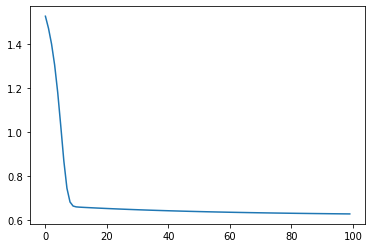

In [60]:
plt.plot(range(len(Loss)),Loss)

In [61]:
###### Now let's write a very simple MLP ######## 
# This time the ask will be straightforward as we will be not need to hand code complicated backward propagation##
# Later on we will see how we can automate the process of batching the data, doing optimizations 
# (If your model has 100 parameters, then current approach may not be great)

In [62]:
mnist_train=pd.read_csv("data/mnist_train.csv")
mnist_test=pd.read_csv("data/mnist_test.csv")

In [63]:
mnist_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X=mnist_train.drop('label',axis=1).values
y=mnist_train['label'].values
X=torch.tensor(X,dtype=torch.float)
y=torch.tensor(y,dtype=torch.float)

In [65]:
w1=torch.randn((784,3),dtype=torch.float)
b1=torch.randn((3,),dtype=torch.float)
w2=torch.randn((3,10),dtype=torch.float)
b2=torch.randn((10,),dtype=torch.float)
def network(X,w1,b1,w2,b2):
    z1=torch.matmul(X.float(),w1)+b1
    res1=torch.sigmoid(z1)
    z2=torch.matmul(res1,w2)+b2
    probs=torch.softmax(z2,axis=1)
    return probs
def CE(probs,y):
    return -torch.log(probs[range(y.shape[0]),y.long()]).mean()

In [66]:
p=network(X,w1,b1,w2,b2)

In [67]:
CE(p,y)

tensor(3.4302, grad_fn=<NegBackward>)

In [68]:
w1=torch.randn((784,3),dtype=torch.float,requires_grad=True)
b1=torch.randn((3,),dtype=torch.float,requires_grad=True)
w2=torch.randn((3,10),dtype=torch.float,requires_grad=True)
b2=torch.randn((10,),dtype=torch.float,requires_grad=True)
lr=0.1
Loss=[]
for i in range(10):
    p=network(X,w1,b1,w2,b2)
    #print(p)
    loss=CE(p,y)
    loss.backward()
    Loss.append(loss.item())
    acc=(p.argmax(axis=1)==y).float().mean().item()
    print(f"Iter {i+1}, loss {loss.item()}, acc {acc}")
    with torch.no_grad():
        w1-=lr*w1.grad
        b1-=lr*b1.grad
        w2-=lr*w2.grad
        b2-=lr*b2.grad
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()   

Iter 1, loss 2.9748666286468506, acc 0.0974285677075386
Iter 2, loss 2.9257547855377197, acc 0.0974285677075386
Iter 3, loss 2.8819117546081543, acc 0.0974285677075386
Iter 4, loss 2.8427894115448, acc 0.09747619181871414
Iter 5, loss 2.807565212249756, acc 0.10457143187522888
Iter 6, loss 2.7757558822631836, acc 0.10478571057319641
Iter 7, loss 2.7470030784606934, acc 0.10473809391260147
Iter 8, loss 2.720926523208618, acc 0.1057380959391594
Iter 9, loss 2.6969566345214844, acc 0.10578571259975433
Iter 10, loss 2.675022602081299, acc 0.10561905056238174


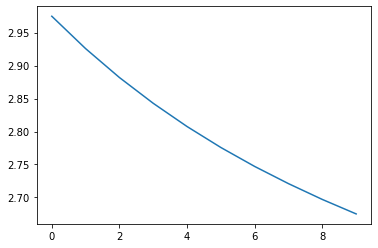

In [69]:
plt.plot(range(len(Loss)),Loss)

In [70]:
w1=torch.randn((784,3),dtype=torch.float,requires_grad=True)
b1=torch.randn((3,),dtype=torch.float,requires_grad=True)
w2=torch.randn((3,10),dtype=torch.float,requires_grad=True)
b2=torch.randn((10,),dtype=torch.float,requires_grad=True)
lr=0.1
Loss=[]
###### Mini Batch
batch_size=100
size=X.shape[0]
steps=size//batch_size
num_epoch=3
for i in range(num_epoch):
    for j in range(steps):
        if j==0:
            start=0
            next_item=start+batch_size
            x=X[start:next_item,]
            Y=y[start:next_item,]
            p=network(x,w1,b1,w2,b2)
            loss=CE(p,Y)
            loss.backward()
            Loss.append(loss.item())
            acc=(p.argmax(axis=1)==Y).float().mean().item()
            print(f"Epoch {i+1}, Iter {j+1}, loss {loss.item()}, acc {acc}")
            with torch.no_grad():
                w1-=lr*w1.grad
                b1-=lr*b1.grad
                w2-=lr*w2.grad
                b2-=lr*b2.grad
                w1.grad.zero_()
                b1.grad.zero_()
                w2.grad.zero_()
                b2.grad.zero_()   
        else:
            start+=batch_size
            next_item+=batch_size
            x=X[start:next_item,]
            Y=y[start:next_item,]
            p=network(x,w1,b1,w2,b2)
            loss=CE(p,Y)
            loss.backward()
            Loss.append(loss.item())
            acc=(p.argmax(axis=1)==Y).float().mean().item()
            print(f"Epoch {i+1}, Iter {j+1}, loss {loss.item()}, acc {acc}")
            with torch.no_grad():
                w1-=lr*w1.grad
                b1-=lr*b1.grad
                w2-=lr*w2.grad
                b2-=lr*b2.grad
                w1.grad.zero_()
                b1.grad.zero_()
                w2.grad.zero_()
                b2.grad.zero_()            

Epoch 1, Iter 1, loss 3.858506441116333, acc 0.14000000059604645
Epoch 1, Iter 2, loss 3.9544589519500732, acc 0.07999999821186066
Epoch 1, Iter 3, loss 3.721339702606201, acc 0.09000000357627869
Epoch 1, Iter 4, loss 3.6383979320526123, acc 0.11999999731779099
Epoch 1, Iter 5, loss 3.4573071002960205, acc 0.10000000149011612
Epoch 1, Iter 6, loss 3.573138952255249, acc 0.09000000357627869
Epoch 1, Iter 7, loss 3.429572820663452, acc 0.09000000357627869
Epoch 1, Iter 8, loss 3.6817681789398193, acc 0.07999999821186066
Epoch 1, Iter 9, loss 3.172441005706787, acc 0.07999999821186066
Epoch 1, Iter 10, loss 3.152134418487549, acc 0.07999999821186066
Epoch 1, Iter 11, loss 3.185713768005371, acc 0.09000000357627869
Epoch 1, Iter 12, loss 3.075507164001465, acc 0.11999999731779099
Epoch 1, Iter 13, loss 3.0589513778686523, acc 0.11999999731779099
Epoch 1, Iter 14, loss 3.0442352294921875, acc 0.11999999731779099
Epoch 1, Iter 15, loss 3.054908037185669, acc 0.07000000029802322
Epoch 1, Iter

Epoch 1, Iter 125, loss 2.378476142883301, acc 0.07000000029802322
Epoch 1, Iter 126, loss 2.3318936824798584, acc 0.10000000149011612
Epoch 1, Iter 127, loss 2.3821661472320557, acc 0.10000000149011612
Epoch 1, Iter 128, loss 2.293911933898926, acc 0.10999999940395355
Epoch 1, Iter 129, loss 2.350341558456421, acc 0.12999999523162842
Epoch 1, Iter 130, loss 2.3369028568267822, acc 0.11999999731779099
Epoch 1, Iter 131, loss 2.3269765377044678, acc 0.18000000715255737
Epoch 1, Iter 132, loss 2.351130723953247, acc 0.12999999523162842
Epoch 1, Iter 133, loss 2.3270630836486816, acc 0.11999999731779099
Epoch 1, Iter 134, loss 2.323092222213745, acc 0.10999999940395355
Epoch 1, Iter 135, loss 2.3328969478607178, acc 0.17000000178813934
Epoch 1, Iter 136, loss 2.2460286617279053, acc 0.11999999731779099
Epoch 1, Iter 137, loss 2.330556869506836, acc 0.07000000029802322
Epoch 1, Iter 138, loss 2.29386305809021, acc 0.09000000357627869
Epoch 1, Iter 139, loss 2.3857619762420654, acc 0.070000

Epoch 1, Iter 247, loss 2.216445207595825, acc 0.1599999964237213
Epoch 1, Iter 248, loss 2.245022773742676, acc 0.23000000417232513
Epoch 1, Iter 249, loss 2.2295174598693848, acc 0.12999999523162842
Epoch 1, Iter 250, loss 2.224292039871216, acc 0.2199999988079071
Epoch 1, Iter 251, loss 2.226398468017578, acc 0.20999999344348907
Epoch 1, Iter 252, loss 2.2896268367767334, acc 0.1599999964237213
Epoch 1, Iter 253, loss 2.248734474182129, acc 0.18000000715255737
Epoch 1, Iter 254, loss 2.278053045272827, acc 0.11999999731779099
Epoch 1, Iter 255, loss 2.2248470783233643, acc 0.15000000596046448
Epoch 1, Iter 256, loss 2.2435758113861084, acc 0.18000000715255737
Epoch 1, Iter 257, loss 2.217998504638672, acc 0.20999999344348907
Epoch 1, Iter 258, loss 2.2831223011016846, acc 0.18000000715255737
Epoch 1, Iter 259, loss 2.2954022884368896, acc 0.10999999940395355
Epoch 1, Iter 260, loss 2.2051494121551514, acc 0.1899999976158142
Epoch 1, Iter 261, loss 2.2755913734436035, acc 0.189999997

Epoch 1, Iter 370, loss 2.17336368560791, acc 0.2199999988079071
Epoch 1, Iter 371, loss 2.203638792037964, acc 0.2199999988079071
Epoch 1, Iter 372, loss 2.18243408203125, acc 0.20000000298023224
Epoch 1, Iter 373, loss 2.16280198097229, acc 0.2199999988079071
Epoch 1, Iter 374, loss 2.1851601600646973, acc 0.1899999976158142
Epoch 1, Iter 375, loss 2.2262115478515625, acc 0.23000000417232513
Epoch 1, Iter 376, loss 2.1926350593566895, acc 0.2199999988079071
Epoch 1, Iter 377, loss 2.1726179122924805, acc 0.20000000298023224
Epoch 1, Iter 378, loss 2.1834828853607178, acc 0.25999999046325684
Epoch 1, Iter 379, loss 2.1640779972076416, acc 0.23000000417232513
Epoch 1, Iter 380, loss 2.162644863128662, acc 0.23999999463558197
Epoch 1, Iter 381, loss 2.1895172595977783, acc 0.15000000596046448
Epoch 1, Iter 382, loss 2.150294303894043, acc 0.23000000417232513
Epoch 1, Iter 383, loss 2.1411800384521484, acc 0.23999999463558197
Epoch 1, Iter 384, loss 2.2112088203430176, acc 0.140000000596

Epoch 2, Iter 76, loss 2.143543004989624, acc 0.30000001192092896
Epoch 2, Iter 77, loss 2.2204768657684326, acc 0.2199999988079071
Epoch 2, Iter 78, loss 2.1562395095825195, acc 0.27000001072883606
Epoch 2, Iter 79, loss 2.090224027633667, acc 0.28999999165534973
Epoch 2, Iter 80, loss 2.1021578311920166, acc 0.25
Epoch 2, Iter 81, loss 2.177950859069824, acc 0.1899999976158142
Epoch 2, Iter 82, loss 2.1911635398864746, acc 0.20000000298023224
Epoch 2, Iter 83, loss 2.1399567127227783, acc 0.25
Epoch 2, Iter 84, loss 2.2666046619415283, acc 0.17000000178813934
Epoch 2, Iter 85, loss 2.1298575401306152, acc 0.23999999463558197
Epoch 2, Iter 86, loss 2.1872994899749756, acc 0.14000000059604645
Epoch 2, Iter 87, loss 2.170240879058838, acc 0.27000001072883606
Epoch 2, Iter 88, loss 2.1517629623413086, acc 0.23000000417232513
Epoch 2, Iter 89, loss 2.160548686981201, acc 0.20999999344348907
Epoch 2, Iter 90, loss 2.1854121685028076, acc 0.23999999463558197
Epoch 2, Iter 91, loss 2.1261904

Epoch 2, Iter 204, loss 2.1568644046783447, acc 0.23000000417232513
Epoch 2, Iter 205, loss 2.0375967025756836, acc 0.25
Epoch 2, Iter 206, loss 2.1434223651885986, acc 0.23999999463558197
Epoch 2, Iter 207, loss 2.1673471927642822, acc 0.20999999344348907
Epoch 2, Iter 208, loss 2.2245607376098633, acc 0.14000000059604645
Epoch 2, Iter 209, loss 2.104931116104126, acc 0.23999999463558197
Epoch 2, Iter 210, loss 2.1306235790252686, acc 0.25999999046325684
Epoch 2, Iter 211, loss 2.0829520225524902, acc 0.2800000011920929
Epoch 2, Iter 212, loss 2.18489933013916, acc 0.18000000715255737
Epoch 2, Iter 213, loss 2.172408103942871, acc 0.18000000715255737
Epoch 2, Iter 214, loss 2.1611902713775635, acc 0.1599999964237213
Epoch 2, Iter 215, loss 2.1258771419525146, acc 0.20999999344348907
Epoch 2, Iter 216, loss 2.180821180343628, acc 0.1899999976158142
Epoch 2, Iter 217, loss 2.107332229614258, acc 0.2199999988079071
Epoch 2, Iter 218, loss 2.1356709003448486, acc 0.23000000417232513
Epoch

Epoch 2, Iter 331, loss 2.1286063194274902, acc 0.2199999988079071
Epoch 2, Iter 332, loss 2.0916597843170166, acc 0.2199999988079071
Epoch 2, Iter 333, loss 2.057666540145874, acc 0.23999999463558197
Epoch 2, Iter 334, loss 2.097505807876587, acc 0.23999999463558197
Epoch 2, Iter 335, loss 2.106513500213623, acc 0.27000001072883606
Epoch 2, Iter 336, loss 2.1462764739990234, acc 0.23999999463558197
Epoch 2, Iter 337, loss 2.152691125869751, acc 0.25
Epoch 2, Iter 338, loss 2.1929383277893066, acc 0.17000000178813934
Epoch 2, Iter 339, loss 2.103379011154175, acc 0.23999999463558197
Epoch 2, Iter 340, loss 2.212196111679077, acc 0.15000000596046448
Epoch 2, Iter 341, loss 2.0289182662963867, acc 0.25
Epoch 2, Iter 342, loss 2.15413761138916, acc 0.2199999988079071
Epoch 2, Iter 343, loss 2.1399805545806885, acc 0.23000000417232513
Epoch 2, Iter 344, loss 2.0412757396698, acc 0.27000001072883606
Epoch 2, Iter 345, loss 2.110443592071533, acc 0.25999999046325684
Epoch 2, Iter 346, loss 2

Epoch 3, Iter 41, loss 2.1238977909088135, acc 0.20999999344348907
Epoch 3, Iter 42, loss 2.048126220703125, acc 0.25
Epoch 3, Iter 43, loss 2.0341925621032715, acc 0.30000001192092896
Epoch 3, Iter 44, loss 2.0531537532806396, acc 0.2800000011920929
Epoch 3, Iter 45, loss 2.0518665313720703, acc 0.28999999165534973
Epoch 3, Iter 46, loss 1.9871793985366821, acc 0.28999999165534973
Epoch 3, Iter 47, loss 2.1615076065063477, acc 0.2199999988079071
Epoch 3, Iter 48, loss 2.0897672176361084, acc 0.2199999988079071
Epoch 3, Iter 49, loss 2.0594358444213867, acc 0.28999999165534973
Epoch 3, Iter 50, loss 1.9866278171539307, acc 0.30000001192092896
Epoch 3, Iter 51, loss 2.0314459800720215, acc 0.27000001072883606
Epoch 3, Iter 52, loss 2.0347862243652344, acc 0.25
Epoch 3, Iter 53, loss 2.0853590965270996, acc 0.23000000417232513
Epoch 3, Iter 54, loss 2.1266679763793945, acc 0.2199999988079071
Epoch 3, Iter 55, loss 2.100121259689331, acc 0.27000001072883606
Epoch 3, Iter 56, loss 2.175292

Epoch 3, Iter 170, loss 1.9974933862686157, acc 0.3400000035762787
Epoch 3, Iter 171, loss 1.9840404987335205, acc 0.3100000023841858
Epoch 3, Iter 172, loss 2.06077241897583, acc 0.23999999463558197
Epoch 3, Iter 173, loss 2.0007126331329346, acc 0.27000001072883606
Epoch 3, Iter 174, loss 1.9660859107971191, acc 0.3199999928474426
Epoch 3, Iter 175, loss 1.938515067100525, acc 0.3199999928474426
Epoch 3, Iter 176, loss 2.090269088745117, acc 0.25
Epoch 3, Iter 177, loss 2.0820343494415283, acc 0.23999999463558197
Epoch 3, Iter 178, loss 1.9841253757476807, acc 0.3100000023841858
Epoch 3, Iter 179, loss 2.0423200130462646, acc 0.27000001072883606
Epoch 3, Iter 180, loss 2.1190974712371826, acc 0.23000000417232513
Epoch 3, Iter 181, loss 1.9321849346160889, acc 0.33000001311302185
Epoch 3, Iter 182, loss 1.963266134262085, acc 0.3100000023841858
Epoch 3, Iter 183, loss 2.0145974159240723, acc 0.3100000023841858
Epoch 3, Iter 184, loss 1.9963603019714355, acc 0.3700000047683716
Epoch 3,

Epoch 3, Iter 297, loss 1.9849400520324707, acc 0.3199999928474426
Epoch 3, Iter 298, loss 1.9917731285095215, acc 0.27000001072883606
Epoch 3, Iter 299, loss 2.14150333404541, acc 0.23000000417232513
Epoch 3, Iter 300, loss 2.0667693614959717, acc 0.25999999046325684
Epoch 3, Iter 301, loss 1.965146541595459, acc 0.36000001430511475
Epoch 3, Iter 302, loss 1.9941606521606445, acc 0.3100000023841858
Epoch 3, Iter 303, loss 2.0340473651885986, acc 0.23999999463558197
Epoch 3, Iter 304, loss 1.9757860898971558, acc 0.3400000035762787
Epoch 3, Iter 305, loss 2.079714059829712, acc 0.27000001072883606
Epoch 3, Iter 306, loss 2.1322176456451416, acc 0.2800000011920929
Epoch 3, Iter 307, loss 1.9920048713684082, acc 0.3400000035762787
Epoch 3, Iter 308, loss 2.0542120933532715, acc 0.23000000417232513
Epoch 3, Iter 309, loss 1.983964204788208, acc 0.3100000023841858
Epoch 3, Iter 310, loss 2.028616189956665, acc 0.27000001072883606
Epoch 3, Iter 311, loss 2.0550882816314697, acc 0.3100000023

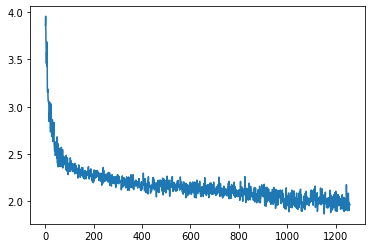

In [71]:
plt.plot(range(len(Loss)),Loss)

In [72]:
###### Is that all that a dl framework offers?
###### Besides automatic gradient computation what else do we get?
###### The first important issue that any dl framework will solve for us is the issue of data handling
from torch.utils.data import Dataset,DataLoader

In [73]:
class MnistData(Dataset):
    def __init__(self,X,y):
        self.X=X
        self.y=y
    def __len__(self):
        return X.shape[0]
    def __getitem__(self,idx):
        X=self.X[idx,]
        y=self.y[idx]
        sample={'X':X,'y':y}
        return sample

In [86]:
X=mnist_train.drop('label',axis=1).values
y=mnist_train['label'].values
mnist=MnistData(X,y)

In [87]:
mnist_batched=DataLoader(mnist,100)

In [92]:
w1=torch.randn((784,3),dtype=torch.float,requires_grad=True)
b1=torch.randn((3,),dtype=torch.float,requires_grad=True)
w2=torch.randn((3,10),dtype=torch.float,requires_grad=True)
b2=torch.randn((10,),dtype=torch.float,requires_grad=True)
lr=0.01
Loss=[]
num_epoch=10
for i in range(num_epoch):
    for j,batch in enumerate(mnist_batched):
        x=batch['X']
        Y=batch['y']
        p=network(x,w1,b1,w2,b2)
        loss=CE(p,Y)
        loss.backward()
        Loss.append(loss.item())
        acc=(p.argmax(axis=1)==Y).float().mean().item()
        print(f"Epoch {i+1}, iter {j+1}, loss {loss.item()}, acc {acc}")
        with torch.no_grad():
            w1-=lr*w1.grad
            b1-=lr*b1.grad
            w2-=lr*w2.grad
            b2-=lr*b2.grad
            w1.grad.zero_()
            b1.grad.zero_()
            w2.grad.zero_()
            b2.grad.zero_()   

Epoch 1, iter 1, loss 3.4628796577453613, acc 0.05999999865889549
Epoch 1, iter 2, loss 3.2974114418029785, acc 0.09000000357627869
Epoch 1, iter 3, loss 3.3616178035736084, acc 0.07000000029802322
Epoch 1, iter 4, loss 3.232241630554199, acc 0.09000000357627869
Epoch 1, iter 5, loss 3.27498197555542, acc 0.14000000059604645
Epoch 1, iter 6, loss 3.4163713455200195, acc 0.10000000149011612
Epoch 1, iter 7, loss 2.786128282546997, acc 0.17000000178813934
Epoch 1, iter 8, loss 3.210542678833008, acc 0.09000000357627869
Epoch 1, iter 9, loss 3.106250047683716, acc 0.10999999940395355
Epoch 1, iter 10, loss 3.352989435195923, acc 0.11999999731779099
Epoch 1, iter 11, loss 3.0772292613983154, acc 0.10999999940395355
Epoch 1, iter 12, loss 3.1429975032806396, acc 0.07999999821186066
Epoch 1, iter 13, loss 3.2882068157196045, acc 0.10999999940395355
Epoch 1, iter 14, loss 3.208022117614746, acc 0.05000000074505806
Epoch 1, iter 15, loss 3.3429174423217773, acc 0.10000000149011612
Epoch 1, ite

Epoch 1, iter 141, loss 2.782973527908325, acc 0.10999999940395355
Epoch 1, iter 142, loss 2.952608346939087, acc 0.10000000149011612
Epoch 1, iter 143, loss 2.9018068313598633, acc 0.03999999910593033
Epoch 1, iter 144, loss 3.007448673248291, acc 0.05999999865889549
Epoch 1, iter 145, loss 2.7799112796783447, acc 0.11999999731779099
Epoch 1, iter 146, loss 2.84248685836792, acc 0.05000000074505806
Epoch 1, iter 147, loss 2.8628857135772705, acc 0.07999999821186066
Epoch 1, iter 148, loss 2.792958974838257, acc 0.09000000357627869
Epoch 1, iter 149, loss 2.9257161617279053, acc 0.10999999940395355
Epoch 1, iter 150, loss 2.6202399730682373, acc 0.10000000149011612
Epoch 1, iter 151, loss 2.753852128982544, acc 0.10000000149011612
Epoch 1, iter 152, loss 2.8701324462890625, acc 0.05000000074505806
Epoch 1, iter 153, loss 2.967689275741577, acc 0.10999999940395355
Epoch 1, iter 154, loss 2.9007132053375244, acc 0.10999999940395355
Epoch 1, iter 155, loss 2.7764880657196045, acc 0.119999

Epoch 1, iter 283, loss 2.7210488319396973, acc 0.10000000149011612
Epoch 1, iter 284, loss 2.5523858070373535, acc 0.07000000029802322
Epoch 1, iter 285, loss 2.5406339168548584, acc 0.12999999523162842
Epoch 1, iter 286, loss 2.5500071048736572, acc 0.03999999910593033
Epoch 1, iter 287, loss 2.634793996810913, acc 0.09000000357627869
Epoch 1, iter 288, loss 2.6051907539367676, acc 0.10000000149011612
Epoch 1, iter 289, loss 2.5291757583618164, acc 0.14000000059604645
Epoch 1, iter 290, loss 2.667059898376465, acc 0.07000000029802322
Epoch 1, iter 291, loss 2.62869930267334, acc 0.07000000029802322
Epoch 1, iter 292, loss 2.6922457218170166, acc 0.10000000149011612
Epoch 1, iter 293, loss 2.631871223449707, acc 0.07999999821186066
Epoch 1, iter 294, loss 2.539203643798828, acc 0.15000000596046448
Epoch 1, iter 295, loss 2.5148513317108154, acc 0.09000000357627869
Epoch 1, iter 296, loss 2.661358594894409, acc 0.10000000149011612
Epoch 1, iter 297, loss 2.6222472190856934, acc 0.05000

Epoch 1, iter 408, loss 2.5014216899871826, acc 0.12999999523162842
Epoch 1, iter 409, loss 2.6293396949768066, acc 0.09000000357627869
Epoch 1, iter 410, loss 2.598235845565796, acc 0.07999999821186066
Epoch 1, iter 411, loss 2.5493361949920654, acc 0.07000000029802322
Epoch 1, iter 412, loss 2.511396884918213, acc 0.09000000357627869
Epoch 1, iter 413, loss 2.564298629760742, acc 0.07000000029802322
Epoch 1, iter 414, loss 2.637518882751465, acc 0.07000000029802322
Epoch 1, iter 415, loss 2.5690972805023193, acc 0.07999999821186066
Epoch 1, iter 416, loss 2.522996664047241, acc 0.07999999821186066
Epoch 1, iter 417, loss 2.5448532104492188, acc 0.10000000149011612
Epoch 1, iter 418, loss 2.583062171936035, acc 0.05999999865889549
Epoch 1, iter 419, loss 2.5512473583221436, acc 0.07999999821186066
Epoch 1, iter 420, loss 2.512557029724121, acc 0.10999999940395355
Epoch 2, iter 1, loss 2.601569890975952, acc 0.07999999821186066
Epoch 2, iter 2, loss 2.478358268737793, acc 0.11999999731

Epoch 2, iter 119, loss 2.515331506729126, acc 0.07999999821186066
Epoch 2, iter 120, loss 2.4447147846221924, acc 0.14000000059604645
Epoch 2, iter 121, loss 2.369691848754883, acc 0.14000000059604645
Epoch 2, iter 122, loss 2.436418056488037, acc 0.09000000357627869
Epoch 2, iter 123, loss 2.4372315406799316, acc 0.12999999523162842
Epoch 2, iter 124, loss 2.60191011428833, acc 0.07000000029802322
Epoch 2, iter 125, loss 2.524622678756714, acc 0.11999999731779099
Epoch 2, iter 126, loss 2.6032605171203613, acc 0.07000000029802322
Epoch 2, iter 127, loss 2.4947266578674316, acc 0.05000000074505806
Epoch 2, iter 128, loss 2.510179042816162, acc 0.05000000074505806
Epoch 2, iter 129, loss 2.540217638015747, acc 0.10999999940395355
Epoch 2, iter 130, loss 2.508297920227051, acc 0.05999999865889549
Epoch 2, iter 131, loss 2.4719057083129883, acc 0.11999999731779099
Epoch 2, iter 132, loss 2.4311981201171875, acc 0.10999999940395355
Epoch 2, iter 133, loss 2.445671796798706, acc 0.10000000

Epoch 2, iter 273, loss 2.4190709590911865, acc 0.10000000149011612
Epoch 2, iter 274, loss 2.360344886779785, acc 0.09000000357627869
Epoch 2, iter 275, loss 2.469632148742676, acc 0.07000000029802322
Epoch 2, iter 276, loss 2.4747567176818848, acc 0.11999999731779099
Epoch 2, iter 277, loss 2.334923505783081, acc 0.15000000596046448
Epoch 2, iter 278, loss 2.3585939407348633, acc 0.12999999523162842
Epoch 2, iter 279, loss 2.4013283252716064, acc 0.10999999940395355
Epoch 2, iter 280, loss 2.327058792114258, acc 0.10000000149011612
Epoch 2, iter 281, loss 2.4097847938537598, acc 0.07000000029802322
Epoch 2, iter 282, loss 2.5276620388031006, acc 0.14000000059604645
Epoch 2, iter 283, loss 2.46806263923645, acc 0.07999999821186066
Epoch 2, iter 284, loss 2.439537763595581, acc 0.05999999865889549
Epoch 2, iter 285, loss 2.405940055847168, acc 0.07999999821186066
Epoch 2, iter 286, loss 2.4192910194396973, acc 0.07999999821186066
Epoch 2, iter 287, loss 2.4517292976379395, acc 0.109999

Epoch 3, iter 17, loss 2.36478853225708, acc 0.10999999940395355
Epoch 3, iter 18, loss 2.449943780899048, acc 0.07000000029802322
Epoch 3, iter 19, loss 2.3917417526245117, acc 0.10000000149011612
Epoch 3, iter 20, loss 2.3061208724975586, acc 0.15000000596046448
Epoch 3, iter 21, loss 2.425468921661377, acc 0.029999999329447746
Epoch 3, iter 22, loss 2.477083444595337, acc 0.05999999865889549
Epoch 3, iter 23, loss 2.4145383834838867, acc 0.09000000357627869
Epoch 3, iter 24, loss 2.3305160999298096, acc 0.15000000596046448
Epoch 3, iter 25, loss 2.432816982269287, acc 0.05999999865889549
Epoch 3, iter 26, loss 2.4085533618927, acc 0.05999999865889549
Epoch 3, iter 27, loss 2.3827157020568848, acc 0.10000000149011612
Epoch 3, iter 28, loss 2.422559976577759, acc 0.07999999821186066
Epoch 3, iter 29, loss 2.3666696548461914, acc 0.10000000149011612
Epoch 3, iter 30, loss 2.4532651901245117, acc 0.10000000149011612
Epoch 3, iter 31, loss 2.4402153491973877, acc 0.10000000149011612
Epoc

Epoch 3, iter 165, loss 2.3980727195739746, acc 0.07999999821186066
Epoch 3, iter 166, loss 2.391594648361206, acc 0.10000000149011612
Epoch 3, iter 167, loss 2.333547353744507, acc 0.09000000357627869
Epoch 3, iter 168, loss 2.3973495960235596, acc 0.10000000149011612
Epoch 3, iter 169, loss 2.4267051219940186, acc 0.10000000149011612
Epoch 3, iter 170, loss 2.4645028114318848, acc 0.07000000029802322
Epoch 3, iter 171, loss 2.378955364227295, acc 0.10999999940395355
Epoch 3, iter 172, loss 2.386709690093994, acc 0.10000000149011612
Epoch 3, iter 173, loss 2.396078586578369, acc 0.09000000357627869
Epoch 3, iter 174, loss 2.3262548446655273, acc 0.07999999821186066
Epoch 3, iter 175, loss 2.37505841255188, acc 0.07999999821186066
Epoch 3, iter 176, loss 2.424989700317383, acc 0.10999999940395355
Epoch 3, iter 177, loss 2.356804132461548, acc 0.05999999865889549
Epoch 3, iter 178, loss 2.350721836090088, acc 0.09000000357627869
Epoch 3, iter 179, loss 2.366633653640747, acc 0.079999998

Epoch 3, iter 326, loss 2.291949510574341, acc 0.12999999523162842
Epoch 3, iter 327, loss 2.3337604999542236, acc 0.12999999523162842
Epoch 3, iter 328, loss 2.432403802871704, acc 0.07000000029802322
Epoch 3, iter 329, loss 2.344999313354492, acc 0.07000000029802322
Epoch 3, iter 330, loss 2.294689893722534, acc 0.11999999731779099
Epoch 3, iter 331, loss 2.323601007461548, acc 0.10000000149011612
Epoch 3, iter 332, loss 2.3348031044006348, acc 0.11999999731779099
Epoch 3, iter 333, loss 2.370610237121582, acc 0.09000000357627869
Epoch 3, iter 334, loss 2.389709234237671, acc 0.05999999865889549
Epoch 3, iter 335, loss 2.311138153076172, acc 0.09000000357627869
Epoch 3, iter 336, loss 2.3314309120178223, acc 0.14000000059604645
Epoch 3, iter 337, loss 2.3343241214752197, acc 0.07000000029802322
Epoch 3, iter 338, loss 2.331068992614746, acc 0.07000000029802322
Epoch 3, iter 339, loss 2.3221590518951416, acc 0.15000000596046448
Epoch 3, iter 340, loss 2.403096914291382, acc 0.10999999

Epoch 4, iter 60, loss 2.3621714115142822, acc 0.07999999821186066
Epoch 4, iter 61, loss 2.3375229835510254, acc 0.05999999865889549
Epoch 4, iter 62, loss 2.292172431945801, acc 0.14000000059604645
Epoch 4, iter 63, loss 2.335615873336792, acc 0.11999999731779099
Epoch 4, iter 64, loss 2.305798292160034, acc 0.07999999821186066
Epoch 4, iter 65, loss 2.3606181144714355, acc 0.07999999821186066
Epoch 4, iter 66, loss 2.324903726577759, acc 0.07999999821186066
Epoch 4, iter 67, loss 2.3541009426116943, acc 0.11999999731779099
Epoch 4, iter 68, loss 2.309887170791626, acc 0.09000000357627869
Epoch 4, iter 69, loss 2.306722640991211, acc 0.10000000149011612
Epoch 4, iter 70, loss 2.3454713821411133, acc 0.10999999940395355
Epoch 4, iter 71, loss 2.3633244037628174, acc 0.10000000149011612
Epoch 4, iter 72, loss 2.4019601345062256, acc 0.05000000074505806
Epoch 4, iter 73, loss 2.325450897216797, acc 0.10000000149011612
Epoch 4, iter 74, loss 2.2912564277648926, acc 0.10999999940395355
Ep

Epoch 4, iter 188, loss 2.3223350048065186, acc 0.10000000149011612
Epoch 4, iter 189, loss 2.3436293601989746, acc 0.10000000149011612
Epoch 4, iter 190, loss 2.3078348636627197, acc 0.10999999940395355
Epoch 4, iter 191, loss 2.2709834575653076, acc 0.10999999940395355
Epoch 4, iter 192, loss 2.357168674468994, acc 0.07999999821186066
Epoch 4, iter 193, loss 2.3331902027130127, acc 0.07000000029802322
Epoch 4, iter 194, loss 2.276759386062622, acc 0.15000000596046448
Epoch 4, iter 195, loss 2.319261074066162, acc 0.10000000149011612
Epoch 4, iter 196, loss 2.3019909858703613, acc 0.12999999523162842
Epoch 4, iter 197, loss 2.2914676666259766, acc 0.09000000357627869
Epoch 4, iter 198, loss 2.324298620223999, acc 0.10999999940395355
Epoch 4, iter 199, loss 2.347490072250366, acc 0.15000000596046448
Epoch 4, iter 200, loss 2.345308780670166, acc 0.1599999964237213
Epoch 4, iter 201, loss 2.3907768726348877, acc 0.07000000029802322
Epoch 4, iter 202, loss 2.293853521347046, acc 0.100000

Epoch 4, iter 328, loss 2.4043190479278564, acc 0.07000000029802322
Epoch 4, iter 329, loss 2.31357479095459, acc 0.07000000029802322
Epoch 4, iter 330, loss 2.2733871936798096, acc 0.11999999731779099
Epoch 4, iter 331, loss 2.313851833343506, acc 0.09000000357627869
Epoch 4, iter 332, loss 2.310142755508423, acc 0.11999999731779099
Epoch 4, iter 333, loss 2.306069850921631, acc 0.10999999940395355
Epoch 4, iter 334, loss 2.32881498336792, acc 0.05999999865889549
Epoch 4, iter 335, loss 2.2862634658813477, acc 0.10000000149011612
Epoch 4, iter 336, loss 2.3040037155151367, acc 0.14000000059604645
Epoch 4, iter 337, loss 2.297577142715454, acc 0.07000000029802322
Epoch 4, iter 338, loss 2.3159444332122803, acc 0.07000000029802322
Epoch 4, iter 339, loss 2.313762664794922, acc 0.12999999523162842
Epoch 4, iter 340, loss 2.367837905883789, acc 0.10999999940395355
Epoch 4, iter 341, loss 2.278501272201538, acc 0.10000000149011612
Epoch 4, iter 342, loss 2.3361728191375732, acc 0.050000000

Epoch 5, iter 42, loss 2.28204607963562, acc 0.07999999821186066
Epoch 5, iter 43, loss 2.306685447692871, acc 0.10999999940395355
Epoch 5, iter 44, loss 2.2754578590393066, acc 0.15000000596046448
Epoch 5, iter 45, loss 2.3491873741149902, acc 0.11999999731779099
Epoch 5, iter 46, loss 2.373767137527466, acc 0.05999999865889549
Epoch 5, iter 47, loss 2.313532590866089, acc 0.09000000357627869
Epoch 5, iter 48, loss 2.322287082672119, acc 0.12999999523162842
Epoch 5, iter 49, loss 2.3590645790100098, acc 0.10999999940395355
Epoch 5, iter 50, loss 2.29264760017395, acc 0.10999999940395355
Epoch 5, iter 51, loss 2.317260980606079, acc 0.10000000149011612
Epoch 5, iter 52, loss 2.331326484680176, acc 0.10000000149011612
Epoch 5, iter 53, loss 2.342548131942749, acc 0.14000000059604645
Epoch 5, iter 54, loss 2.2642650604248047, acc 0.07999999821186066
Epoch 5, iter 55, loss 2.3049700260162354, acc 0.09000000357627869
Epoch 5, iter 56, loss 2.2915468215942383, acc 0.10999999940395355
Epoch 

Epoch 5, iter 192, loss 2.3208327293395996, acc 0.11999999731779099
Epoch 5, iter 193, loss 2.3150711059570312, acc 0.14000000059604645
Epoch 5, iter 194, loss 2.2478134632110596, acc 0.1599999964237213
Epoch 5, iter 195, loss 2.2792441844940186, acc 0.18000000715255737
Epoch 5, iter 196, loss 2.2745773792266846, acc 0.1899999976158142
Epoch 5, iter 197, loss 2.277524948120117, acc 0.15000000596046448
Epoch 5, iter 198, loss 2.2931885719299316, acc 0.11999999731779099
Epoch 5, iter 199, loss 2.310328722000122, acc 0.17000000178813934
Epoch 5, iter 200, loss 2.340404748916626, acc 0.14000000059604645
Epoch 5, iter 201, loss 2.3459105491638184, acc 0.11999999731779099
Epoch 5, iter 202, loss 2.264159917831421, acc 0.14000000059604645
Epoch 5, iter 203, loss 2.2822279930114746, acc 0.09000000357627869
Epoch 5, iter 204, loss 2.333988904953003, acc 0.11999999731779099
Epoch 5, iter 205, loss 2.332733631134033, acc 0.07999999821186066
Epoch 5, iter 206, loss 2.2702064514160156, acc 0.189999

Epoch 5, iter 334, loss 2.276608943939209, acc 0.10000000149011612
Epoch 5, iter 335, loss 2.2574355602264404, acc 0.10999999940395355
Epoch 5, iter 336, loss 2.279939651489258, acc 0.07000000029802322
Epoch 5, iter 337, loss 2.261301040649414, acc 0.10999999940395355
Epoch 5, iter 338, loss 2.2921760082244873, acc 0.09000000357627869
Epoch 5, iter 339, loss 2.3046915531158447, acc 0.11999999731779099
Epoch 5, iter 340, loss 2.3244822025299072, acc 0.11999999731779099
Epoch 5, iter 341, loss 2.258974313735962, acc 0.10000000149011612
Epoch 5, iter 342, loss 2.301293134689331, acc 0.10999999940395355
Epoch 5, iter 343, loss 2.2244913578033447, acc 0.17000000178813934
Epoch 5, iter 344, loss 2.3268685340881348, acc 0.09000000357627869
Epoch 5, iter 345, loss 2.285013198852539, acc 0.09000000357627869
Epoch 5, iter 346, loss 2.3733956813812256, acc 0.07999999821186066
Epoch 5, iter 347, loss 2.3113210201263428, acc 0.17000000178813934
Epoch 5, iter 348, loss 2.307232141494751, acc 0.12999

Epoch 6, iter 54, loss 2.241621255874634, acc 0.1599999964237213
Epoch 6, iter 55, loss 2.2790114879608154, acc 0.15000000596046448
Epoch 6, iter 56, loss 2.267408847808838, acc 0.11999999731779099
Epoch 6, iter 57, loss 2.2334227561950684, acc 0.1599999964237213
Epoch 6, iter 58, loss 2.310739517211914, acc 0.10999999940395355
Epoch 6, iter 59, loss 2.3386008739471436, acc 0.10000000149011612
Epoch 6, iter 60, loss 2.287837266921997, acc 0.10000000149011612
Epoch 6, iter 61, loss 2.2469890117645264, acc 0.11999999731779099
Epoch 6, iter 62, loss 2.239598512649536, acc 0.18000000715255737
Epoch 6, iter 63, loss 2.272237777709961, acc 0.1599999964237213
Epoch 6, iter 64, loss 2.2328851222991943, acc 0.12999999523162842
Epoch 6, iter 65, loss 2.2637834548950195, acc 0.10999999940395355
Epoch 6, iter 66, loss 2.2607626914978027, acc 0.12999999523162842
Epoch 6, iter 67, loss 2.2786686420440674, acc 0.14000000059604645
Epoch 6, iter 68, loss 2.2630131244659424, acc 0.11999999731779099
Epoc

Epoch 6, iter 206, loss 2.2699010372161865, acc 0.1899999976158142
Epoch 6, iter 207, loss 2.334663152694702, acc 0.09000000357627869
Epoch 6, iter 208, loss 2.306666374206543, acc 0.15000000596046448
Epoch 6, iter 209, loss 2.2745838165283203, acc 0.1599999964237213
Epoch 6, iter 210, loss 2.248410224914551, acc 0.15000000596046448
Epoch 6, iter 211, loss 2.3197555541992188, acc 0.12999999523162842
Epoch 6, iter 212, loss 2.285594940185547, acc 0.2199999988079071
Epoch 6, iter 213, loss 2.204944610595703, acc 0.1599999964237213
Epoch 6, iter 214, loss 2.3267126083374023, acc 0.09000000357627869
Epoch 6, iter 215, loss 2.3204309940338135, acc 0.10999999940395355
Epoch 6, iter 216, loss 2.275038719177246, acc 0.12999999523162842
Epoch 6, iter 217, loss 2.263859272003174, acc 0.12999999523162842
Epoch 6, iter 218, loss 2.3512251377105713, acc 0.11999999731779099
Epoch 6, iter 219, loss 2.227825403213501, acc 0.12999999523162842
Epoch 6, iter 220, loss 2.346187114715576, acc 0.10999999940

Epoch 6, iter 344, loss 2.2838447093963623, acc 0.10000000149011612
Epoch 6, iter 345, loss 2.261364698410034, acc 0.10000000149011612
Epoch 6, iter 346, loss 2.3492496013641357, acc 0.07999999821186066
Epoch 6, iter 347, loss 2.288677453994751, acc 0.18000000715255737
Epoch 6, iter 348, loss 2.27620792388916, acc 0.12999999523162842
Epoch 6, iter 349, loss 2.2965309619903564, acc 0.09000000357627869
Epoch 6, iter 350, loss 2.2875006198883057, acc 0.11999999731779099
Epoch 6, iter 351, loss 2.2044496536254883, acc 0.18000000715255737
Epoch 6, iter 352, loss 2.306654930114746, acc 0.12999999523162842
Epoch 6, iter 353, loss 2.2053451538085938, acc 0.20999999344348907
Epoch 6, iter 354, loss 2.304722547531128, acc 0.12999999523162842
Epoch 6, iter 355, loss 2.2940943241119385, acc 0.10000000149011612
Epoch 6, iter 356, loss 2.2667179107666016, acc 0.10000000149011612
Epoch 6, iter 357, loss 2.2540621757507324, acc 0.14000000059604645
Epoch 6, iter 358, loss 2.2458364963531494, acc 0.1599

Epoch 7, iter 53, loss 2.310170888900757, acc 0.15000000596046448
Epoch 7, iter 54, loss 2.228506565093994, acc 0.14000000059604645
Epoch 7, iter 55, loss 2.2597460746765137, acc 0.17000000178813934
Epoch 7, iter 56, loss 2.2281720638275146, acc 0.12999999523162842
Epoch 7, iter 57, loss 2.1992645263671875, acc 0.1599999964237213
Epoch 7, iter 58, loss 2.2793219089508057, acc 0.10999999940395355
Epoch 7, iter 59, loss 2.314406394958496, acc 0.10000000149011612
Epoch 7, iter 60, loss 2.275378465652466, acc 0.10000000149011612
Epoch 7, iter 61, loss 2.217125177383423, acc 0.14000000059604645
Epoch 7, iter 62, loss 2.2263283729553223, acc 0.18000000715255737
Epoch 7, iter 63, loss 2.2520525455474854, acc 0.1599999964237213
Epoch 7, iter 64, loss 2.2247257232666016, acc 0.10999999940395355
Epoch 7, iter 65, loss 2.2485697269439697, acc 0.10999999940395355
Epoch 7, iter 66, loss 2.237531900405884, acc 0.14000000059604645
Epoch 7, iter 67, loss 2.270357131958008, acc 0.14000000059604645
Epoc

Epoch 7, iter 195, loss 2.224217653274536, acc 0.18000000715255737
Epoch 7, iter 196, loss 2.234705686569214, acc 0.1899999976158142
Epoch 7, iter 197, loss 2.2357077598571777, acc 0.17000000178813934
Epoch 7, iter 198, loss 2.249824285507202, acc 0.11999999731779099
Epoch 7, iter 199, loss 2.2777037620544434, acc 0.17000000178813934
Epoch 7, iter 200, loss 2.286104679107666, acc 0.17000000178813934
Epoch 7, iter 201, loss 2.2674765586853027, acc 0.11999999731779099
Epoch 7, iter 202, loss 2.2214136123657227, acc 0.14000000059604645
Epoch 7, iter 203, loss 2.245736598968506, acc 0.09000000357627869
Epoch 7, iter 204, loss 2.2480878829956055, acc 0.12999999523162842
Epoch 7, iter 205, loss 2.271852493286133, acc 0.09000000357627869
Epoch 7, iter 206, loss 2.246371269226074, acc 0.1899999976158142
Epoch 7, iter 207, loss 2.320695400238037, acc 0.09000000357627869
Epoch 7, iter 208, loss 2.293930768966675, acc 0.15000000596046448
Epoch 7, iter 209, loss 2.261353015899658, acc 0.1599999964

Epoch 7, iter 360, loss 2.295745372772217, acc 0.10000000149011612
Epoch 7, iter 361, loss 2.2221083641052246, acc 0.20000000298023224
Epoch 7, iter 362, loss 2.245828628540039, acc 0.10000000149011612
Epoch 7, iter 363, loss 2.237231492996216, acc 0.11999999731779099
Epoch 7, iter 364, loss 2.317026138305664, acc 0.14000000059604645
Epoch 7, iter 365, loss 2.274533271789551, acc 0.14000000059604645
Epoch 7, iter 366, loss 2.291851758956909, acc 0.10999999940395355
Epoch 7, iter 367, loss 2.2584142684936523, acc 0.09000000357627869
Epoch 7, iter 368, loss 2.297563314437866, acc 0.09000000357627869
Epoch 7, iter 369, loss 2.1949307918548584, acc 0.20000000298023224
Epoch 7, iter 370, loss 2.2036991119384766, acc 0.14000000059604645
Epoch 7, iter 371, loss 2.264979362487793, acc 0.11999999731779099
Epoch 7, iter 372, loss 2.2180964946746826, acc 0.1599999964237213
Epoch 7, iter 373, loss 2.25313401222229, acc 0.14000000059604645
Epoch 7, iter 374, loss 2.2164690494537354, acc 0.180000007

Epoch 8, iter 66, loss 2.2317934036254883, acc 0.12999999523162842
Epoch 8, iter 67, loss 2.2660884857177734, acc 0.12999999523162842
Epoch 8, iter 68, loss 2.2238030433654785, acc 0.11999999731779099
Epoch 8, iter 69, loss 2.1930627822875977, acc 0.12999999523162842
Epoch 8, iter 70, loss 2.2758240699768066, acc 0.11999999731779099
Epoch 8, iter 71, loss 2.2552642822265625, acc 0.1599999964237213
Epoch 8, iter 72, loss 2.2961204051971436, acc 0.07999999821186066
Epoch 8, iter 73, loss 2.238607883453369, acc 0.15000000596046448
Epoch 8, iter 74, loss 2.1945862770080566, acc 0.14000000059604645
Epoch 8, iter 75, loss 2.278005838394165, acc 0.14000000059604645
Epoch 8, iter 76, loss 2.2495954036712646, acc 0.17000000178813934
Epoch 8, iter 77, loss 2.2651045322418213, acc 0.11999999731779099
Epoch 8, iter 78, loss 2.2422218322753906, acc 0.15000000596046448
Epoch 8, iter 79, loss 2.2400128841400146, acc 0.12999999523162842
Epoch 8, iter 80, loss 2.2494394779205322, acc 0.2000000029802322

Epoch 8, iter 197, loss 2.1979103088378906, acc 0.1899999976158142
Epoch 8, iter 198, loss 2.2267730236053467, acc 0.11999999731779099
Epoch 8, iter 199, loss 2.261683702468872, acc 0.17000000178813934
Epoch 8, iter 200, loss 2.2596852779388428, acc 0.1599999964237213
Epoch 8, iter 201, loss 2.2522053718566895, acc 0.11999999731779099
Epoch 8, iter 202, loss 2.2066380977630615, acc 0.14000000059604645
Epoch 8, iter 203, loss 2.2315661907196045, acc 0.09000000357627869
Epoch 8, iter 204, loss 2.256462812423706, acc 0.11999999731779099
Epoch 8, iter 205, loss 2.256272315979004, acc 0.09000000357627869
Epoch 8, iter 206, loss 2.209573745727539, acc 0.20000000298023224
Epoch 8, iter 207, loss 2.2976622581481934, acc 0.10000000149011612
Epoch 8, iter 208, loss 2.279933214187622, acc 0.15000000596046448
Epoch 8, iter 209, loss 2.251288414001465, acc 0.1599999964237213
Epoch 8, iter 210, loss 2.2120516300201416, acc 0.18000000715255737
Epoch 8, iter 211, loss 2.268658399581909, acc 0.12999999

Epoch 8, iter 361, loss 2.2089877128601074, acc 0.20999999344348907
Epoch 8, iter 362, loss 2.238166332244873, acc 0.10000000149011612
Epoch 8, iter 363, loss 2.223954200744629, acc 0.11999999731779099
Epoch 8, iter 364, loss 2.3078362941741943, acc 0.14000000059604645
Epoch 8, iter 365, loss 2.27428936958313, acc 0.14000000059604645
Epoch 8, iter 366, loss 2.2728371620178223, acc 0.10999999940395355
Epoch 8, iter 367, loss 2.2523114681243896, acc 0.09000000357627869
Epoch 8, iter 368, loss 2.284158706665039, acc 0.09000000357627869
Epoch 8, iter 369, loss 2.1754257678985596, acc 0.20000000298023224
Epoch 8, iter 370, loss 2.193302869796753, acc 0.12999999523162842
Epoch 8, iter 371, loss 2.2446327209472656, acc 0.10999999940395355
Epoch 8, iter 372, loss 2.204369306564331, acc 0.1599999964237213
Epoch 8, iter 373, loss 2.235804796218872, acc 0.14000000059604645
Epoch 8, iter 374, loss 2.2094075679779053, acc 0.20000000298023224
Epoch 8, iter 375, loss 2.2531237602233887, acc 0.1099999

Epoch 9, iter 82, loss 2.1933014392852783, acc 0.15000000596046448
Epoch 9, iter 83, loss 2.249595880508423, acc 0.10000000149011612
Epoch 9, iter 84, loss 2.193284034729004, acc 0.17000000178813934
Epoch 9, iter 85, loss 2.2354674339294434, acc 0.10000000149011612
Epoch 9, iter 86, loss 2.1643872261047363, acc 0.1899999976158142
Epoch 9, iter 87, loss 2.1572983264923096, acc 0.15000000596046448
Epoch 9, iter 88, loss 2.213644504547119, acc 0.12999999523162842
Epoch 9, iter 89, loss 2.2233903408050537, acc 0.14000000059604645
Epoch 9, iter 90, loss 2.2356746196746826, acc 0.1599999964237213
Epoch 9, iter 91, loss 2.203730821609497, acc 0.12999999523162842
Epoch 9, iter 92, loss 2.182021379470825, acc 0.20000000298023224
Epoch 9, iter 93, loss 2.238041877746582, acc 0.07999999821186066
Epoch 9, iter 94, loss 2.2237186431884766, acc 0.1599999964237213
Epoch 9, iter 95, loss 2.2070066928863525, acc 0.1599999964237213
Epoch 9, iter 96, loss 2.2332024574279785, acc 0.12999999523162842
Epoch

Epoch 9, iter 218, loss 2.3278446197509766, acc 0.09000000357627869
Epoch 9, iter 219, loss 2.2006189823150635, acc 0.17000000178813934
Epoch 9, iter 220, loss 2.262097120285034, acc 0.1899999976158142
Epoch 9, iter 221, loss 2.2050256729125977, acc 0.18000000715255737
Epoch 9, iter 222, loss 2.218829870223999, acc 0.10999999940395355
Epoch 9, iter 223, loss 2.139516830444336, acc 0.25999999046325684
Epoch 9, iter 224, loss 2.223281145095825, acc 0.10999999940395355
Epoch 9, iter 225, loss 2.247053384780884, acc 0.09000000357627869
Epoch 9, iter 226, loss 2.1675217151641846, acc 0.1899999976158142
Epoch 9, iter 227, loss 2.2241551876068115, acc 0.14000000059604645
Epoch 9, iter 228, loss 2.173682451248169, acc 0.2199999988079071
Epoch 9, iter 229, loss 2.2408699989318848, acc 0.11999999731779099
Epoch 9, iter 230, loss 2.2311513423919678, acc 0.11999999731779099
Epoch 9, iter 231, loss 2.2069907188415527, acc 0.1599999964237213
Epoch 9, iter 232, loss 2.297337532043457, acc 0.140000000

Epoch 9, iter 362, loss 2.230534315109253, acc 0.09000000357627869
Epoch 9, iter 363, loss 2.2121758460998535, acc 0.10999999940395355
Epoch 9, iter 364, loss 2.2986409664154053, acc 0.1899999976158142
Epoch 9, iter 365, loss 2.252180576324463, acc 0.17000000178813934
Epoch 9, iter 366, loss 2.2563207149505615, acc 0.10999999940395355
Epoch 9, iter 367, loss 2.2302114963531494, acc 0.10999999940395355
Epoch 9, iter 368, loss 2.2860896587371826, acc 0.15000000596046448
Epoch 9, iter 369, loss 2.1738696098327637, acc 0.2199999988079071
Epoch 9, iter 370, loss 2.1816775798797607, acc 0.1899999976158142
Epoch 9, iter 371, loss 2.2049436569213867, acc 0.18000000715255737
Epoch 9, iter 372, loss 2.1889820098876953, acc 0.11999999731779099
Epoch 9, iter 373, loss 2.2181906700134277, acc 0.17000000178813934
Epoch 9, iter 374, loss 2.1991164684295654, acc 0.18000000715255737
Epoch 9, iter 375, loss 2.2328460216522217, acc 0.09000000357627869
Epoch 9, iter 376, loss 2.1550426483154297, acc 0.200

Epoch 10, iter 97, loss 2.2527050971984863, acc 0.15000000596046448
Epoch 10, iter 98, loss 2.2525832653045654, acc 0.18000000715255737
Epoch 10, iter 99, loss 2.1898577213287354, acc 0.2199999988079071
Epoch 10, iter 100, loss 2.2443125247955322, acc 0.23000000417232513
Epoch 10, iter 101, loss 2.2557930946350098, acc 0.1599999964237213
Epoch 10, iter 102, loss 2.2154135704040527, acc 0.1899999976158142
Epoch 10, iter 103, loss 2.2411398887634277, acc 0.15000000596046448
Epoch 10, iter 104, loss 2.1960740089416504, acc 0.18000000715255737
Epoch 10, iter 105, loss 2.2006664276123047, acc 0.2800000011920929
Epoch 10, iter 106, loss 2.195821762084961, acc 0.25
Epoch 10, iter 107, loss 2.1618785858154297, acc 0.25
Epoch 10, iter 108, loss 2.1721534729003906, acc 0.20000000298023224
Epoch 10, iter 109, loss 2.2558882236480713, acc 0.14000000059604645
Epoch 10, iter 110, loss 2.2450149059295654, acc 0.20000000298023224
Epoch 10, iter 111, loss 2.2477807998657227, acc 0.17000000178813934
Epo

Epoch 10, iter 265, loss 2.224194288253784, acc 0.18000000715255737
Epoch 10, iter 266, loss 2.164968967437744, acc 0.23999999463558197
Epoch 10, iter 267, loss 2.188218116760254, acc 0.23999999463558197
Epoch 10, iter 268, loss 2.2271294593811035, acc 0.1899999976158142
Epoch 10, iter 269, loss 2.175137758255005, acc 0.23999999463558197
Epoch 10, iter 270, loss 2.218823194503784, acc 0.11999999731779099
Epoch 10, iter 271, loss 2.206106185913086, acc 0.20000000298023224
Epoch 10, iter 272, loss 2.205829381942749, acc 0.20999999344348907
Epoch 10, iter 273, loss 2.200883626937866, acc 0.20000000298023224
Epoch 10, iter 274, loss 2.145418643951416, acc 0.27000001072883606
Epoch 10, iter 275, loss 2.1819567680358887, acc 0.25999999046325684
Epoch 10, iter 276, loss 2.244549512863159, acc 0.15000000596046448
Epoch 10, iter 277, loss 2.203664779663086, acc 0.18000000715255737
Epoch 10, iter 278, loss 2.202664375305176, acc 0.18000000715255737
Epoch 10, iter 279, loss 2.180101156234741, acc

Epoch 10, iter 403, loss 2.190093755722046, acc 0.20000000298023224
Epoch 10, iter 404, loss 2.165290594100952, acc 0.17000000178813934
Epoch 10, iter 405, loss 2.1373605728149414, acc 0.23999999463558197
Epoch 10, iter 406, loss 2.229752779006958, acc 0.15000000596046448
Epoch 10, iter 407, loss 2.2153546810150146, acc 0.1899999976158142
Epoch 10, iter 408, loss 2.14640212059021, acc 0.25
Epoch 10, iter 409, loss 2.2358946800231934, acc 0.1899999976158142
Epoch 10, iter 410, loss 2.2484934329986572, acc 0.2199999988079071
Epoch 10, iter 411, loss 2.194058895111084, acc 0.25999999046325684
Epoch 10, iter 412, loss 2.1744208335876465, acc 0.2199999988079071
Epoch 10, iter 413, loss 2.235090732574463, acc 0.14000000059604645
Epoch 10, iter 414, loss 2.1612958908081055, acc 0.1899999976158142
Epoch 10, iter 415, loss 2.149182081222534, acc 0.28999999165534973
Epoch 10, iter 416, loss 2.1767475605010986, acc 0.25999999046325684
Epoch 10, iter 417, loss 2.2383384704589844, acc 0.14000000059

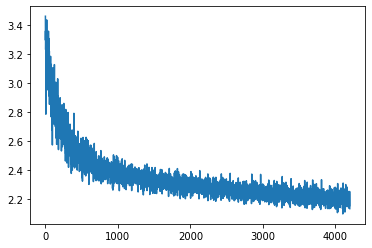

In [93]:
plt.plot(range(len(Loss)),Loss)

In [94]:
###### Another abstraction that any dl framework would provide is at the level of parameter updates and layer creation
from torch import nn

In [117]:
#### Create a model with nn class ####
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1=nn.Parameter(torch.randn((784,3),dtype=torch.float))
        self.b1=nn.Parameter(torch.randn((3,),dtype=torch.float))
        self.w2=nn.Parameter(torch.randn((3,10),dtype=torch.float))
        self.b2=nn.Parameter(torch.randn((10,),dtype=torch.float))
    def forward(self,X):
        z1=torch.matmul(X.float(),self.w1)+self.b1
        res1=torch.sigmoid(z1)
        z2=torch.matmul(res1,self.w2)+self.b2
        probs=torch.softmax(z2,axis=1)
        return probs

In [118]:
mod=MLP()

In [120]:
lr=0.01
Loss=[]
num_epoch=10
for i in range(num_epoch):
    for j,batch in enumerate(mnist_batched):
        x=batch['X']
        Y=batch['y']
        p=mod(x)
        loss=CE(p,Y)
        loss.backward()
        Loss.append(loss.item())
        acc=(p.argmax(axis=1)==Y).float().mean().item()
        print(f"Epoch {i+1}, iter {j+1}, loss {loss.item()}, acc {acc}")
        with torch.no_grad():
            for p in mod.parameters():
                p-=lr*p.grad
            mod.zero_grad()

Epoch 1, iter 1, loss 3.0090157985687256, acc 0.10000000149011612
Epoch 1, iter 2, loss 3.146354913711548, acc 0.07999999821186066
Epoch 1, iter 3, loss 2.8467047214508057, acc 0.12999999523162842
Epoch 1, iter 4, loss 2.9656484127044678, acc 0.15000000596046448
Epoch 1, iter 5, loss 3.011373996734619, acc 0.15000000596046448
Epoch 1, iter 6, loss 2.895967483520508, acc 0.11999999731779099
Epoch 1, iter 7, loss 3.105537176132202, acc 0.05000000074505806
Epoch 1, iter 8, loss 2.8901865482330322, acc 0.09000000357627869
Epoch 1, iter 9, loss 3.0819036960601807, acc 0.07999999821186066
Epoch 1, iter 10, loss 2.9675917625427246, acc 0.1599999964237213
Epoch 1, iter 11, loss 3.1372387409210205, acc 0.10000000149011612
Epoch 1, iter 12, loss 2.8326616287231445, acc 0.14000000059604645
Epoch 1, iter 13, loss 2.829378366470337, acc 0.1599999964237213
Epoch 1, iter 14, loss 2.8728878498077393, acc 0.10000000149011612
Epoch 1, iter 15, loss 2.84531307220459, acc 0.07999999821186066
Epoch 1, iter

Epoch 1, iter 141, loss 2.7146570682525635, acc 0.10000000149011612
Epoch 1, iter 142, loss 2.736245632171631, acc 0.12999999523162842
Epoch 1, iter 143, loss 2.6926608085632324, acc 0.10999999940395355
Epoch 1, iter 144, loss 2.8272898197174072, acc 0.10000000149011612
Epoch 1, iter 145, loss 2.866701126098633, acc 0.05999999865889549
Epoch 1, iter 146, loss 2.7772417068481445, acc 0.09000000357627869
Epoch 1, iter 147, loss 2.6977148056030273, acc 0.07000000029802322
Epoch 1, iter 148, loss 2.7026844024658203, acc 0.05000000074505806
Epoch 1, iter 149, loss 2.8730220794677734, acc 0.009999999776482582
Epoch 1, iter 150, loss 2.516557216644287, acc 0.14000000059604645
Epoch 1, iter 151, loss 2.612522602081299, acc 0.07000000029802322
Epoch 1, iter 152, loss 2.673288583755493, acc 0.11999999731779099
Epoch 1, iter 153, loss 2.746077299118042, acc 0.11999999731779099
Epoch 1, iter 154, loss 2.7219648361206055, acc 0.05999999865889549
Epoch 1, iter 155, loss 2.699500799179077, acc 0.0799

Epoch 1, iter 264, loss 2.512903928756714, acc 0.12999999523162842
Epoch 1, iter 265, loss 2.425286054611206, acc 0.1899999976158142
Epoch 1, iter 266, loss 2.6450564861297607, acc 0.14000000059604645
Epoch 1, iter 267, loss 2.526576519012451, acc 0.14000000059604645
Epoch 1, iter 268, loss 2.5235238075256348, acc 0.18000000715255737
Epoch 1, iter 269, loss 2.5095784664154053, acc 0.18000000715255737
Epoch 1, iter 270, loss 2.691629409790039, acc 0.09000000357627869
Epoch 1, iter 271, loss 2.52885365486145, acc 0.20000000298023224
Epoch 1, iter 272, loss 2.5998852252960205, acc 0.12999999523162842
Epoch 1, iter 273, loss 2.6757471561431885, acc 0.10000000149011612
Epoch 1, iter 274, loss 2.656121253967285, acc 0.07999999821186066
Epoch 1, iter 275, loss 2.687093734741211, acc 0.10000000149011612
Epoch 1, iter 276, loss 2.6444361209869385, acc 0.12999999523162842
Epoch 1, iter 277, loss 2.3674964904785156, acc 0.1899999976158142
Epoch 1, iter 278, loss 2.5372507572174072, acc 0.17000000

Epoch 1, iter 389, loss 2.5634849071502686, acc 0.17000000178813934
Epoch 1, iter 390, loss 2.5601577758789062, acc 0.18000000715255737
Epoch 1, iter 391, loss 2.5677378177642822, acc 0.17000000178813934
Epoch 1, iter 392, loss 2.7361254692077637, acc 0.11999999731779099
Epoch 1, iter 393, loss 2.5047597885131836, acc 0.12999999523162842
Epoch 1, iter 394, loss 2.496879816055298, acc 0.1599999964237213
Epoch 1, iter 395, loss 2.5064713954925537, acc 0.12999999523162842
Epoch 1, iter 396, loss 2.6894681453704834, acc 0.12999999523162842
Epoch 1, iter 397, loss 2.560837984085083, acc 0.10000000149011612
Epoch 1, iter 398, loss 2.568557024002075, acc 0.15000000596046448
Epoch 1, iter 399, loss 2.5939950942993164, acc 0.17000000178813934
Epoch 1, iter 400, loss 2.4724254608154297, acc 0.10000000149011612
Epoch 1, iter 401, loss 2.5079452991485596, acc 0.11999999731779099
Epoch 1, iter 402, loss 2.473536729812622, acc 0.17000000178813934
Epoch 1, iter 403, loss 2.6653597354888916, acc 0.119

Epoch 2, iter 111, loss 2.497779130935669, acc 0.10000000149011612
Epoch 2, iter 112, loss 2.4572393894195557, acc 0.18000000715255737
Epoch 2, iter 113, loss 2.441890001296997, acc 0.10999999940395355
Epoch 2, iter 114, loss 2.4252822399139404, acc 0.1599999964237213
Epoch 2, iter 115, loss 2.396118402481079, acc 0.10999999940395355
Epoch 2, iter 116, loss 2.4311935901641846, acc 0.11999999731779099
Epoch 2, iter 117, loss 2.5189969539642334, acc 0.1599999964237213
Epoch 2, iter 118, loss 2.440319776535034, acc 0.17000000178813934
Epoch 2, iter 119, loss 2.424490213394165, acc 0.1599999964237213
Epoch 2, iter 120, loss 2.4218268394470215, acc 0.17000000178813934
Epoch 2, iter 121, loss 2.500554084777832, acc 0.14000000059604645
Epoch 2, iter 122, loss 2.4230780601501465, acc 0.14000000059604645
Epoch 2, iter 123, loss 2.4658913612365723, acc 0.1899999976158142
Epoch 2, iter 124, loss 2.386932849884033, acc 0.07999999821186066
Epoch 2, iter 125, loss 2.449551582336426, acc 0.1000000014

Epoch 2, iter 241, loss 2.4606590270996094, acc 0.14000000059604645
Epoch 2, iter 242, loss 2.5924019813537598, acc 0.07999999821186066
Epoch 2, iter 243, loss 2.531423568725586, acc 0.17000000178813934
Epoch 2, iter 244, loss 2.488921880722046, acc 0.14000000059604645
Epoch 2, iter 245, loss 2.2994585037231445, acc 0.20000000298023224
Epoch 2, iter 246, loss 2.370619773864746, acc 0.20000000298023224
Epoch 2, iter 247, loss 2.4039626121520996, acc 0.11999999731779099
Epoch 2, iter 248, loss 2.3345017433166504, acc 0.17000000178813934
Epoch 2, iter 249, loss 2.4202828407287598, acc 0.14000000059604645
Epoch 2, iter 250, loss 2.3786165714263916, acc 0.14000000059604645
Epoch 2, iter 251, loss 2.4295928478240967, acc 0.1599999964237213
Epoch 2, iter 252, loss 2.326082229614258, acc 0.15000000596046448
Epoch 2, iter 253, loss 2.565126895904541, acc 0.1599999964237213
Epoch 2, iter 254, loss 2.3198280334472656, acc 0.14000000059604645
Epoch 2, iter 255, loss 2.5963590145111084, acc 0.12999

Epoch 2, iter 376, loss 2.3313679695129395, acc 0.14000000059604645
Epoch 2, iter 377, loss 2.4293127059936523, acc 0.10000000149011612
Epoch 2, iter 378, loss 2.3655271530151367, acc 0.17000000178813934
Epoch 2, iter 379, loss 2.4356648921966553, acc 0.15000000596046448
Epoch 2, iter 380, loss 2.420717477798462, acc 0.14000000059604645
Epoch 2, iter 381, loss 2.4577693939208984, acc 0.18000000715255737
Epoch 2, iter 382, loss 2.281832456588745, acc 0.1899999976158142
Epoch 2, iter 383, loss 2.4243807792663574, acc 0.17000000178813934
Epoch 2, iter 384, loss 2.4190566539764404, acc 0.10000000149011612
Epoch 2, iter 385, loss 2.5016112327575684, acc 0.09000000357627869
Epoch 2, iter 386, loss 2.3484325408935547, acc 0.1599999964237213
Epoch 2, iter 387, loss 2.363943576812744, acc 0.15000000596046448
Epoch 2, iter 388, loss 2.383838176727295, acc 0.1899999976158142
Epoch 2, iter 389, loss 2.373671054840088, acc 0.15000000596046448
Epoch 2, iter 390, loss 2.4117934703826904, acc 0.150000

Epoch 3, iter 92, loss 2.4466898441314697, acc 0.15000000596046448
Epoch 3, iter 93, loss 2.3815441131591797, acc 0.11999999731779099
Epoch 3, iter 94, loss 2.338801622390747, acc 0.14000000059604645
Epoch 3, iter 95, loss 2.4585177898406982, acc 0.09000000357627869
Epoch 3, iter 96, loss 2.2686607837677, acc 0.2199999988079071
Epoch 3, iter 97, loss 2.4154911041259766, acc 0.07000000029802322
Epoch 3, iter 98, loss 2.326753616333008, acc 0.17000000178813934
Epoch 3, iter 99, loss 2.4552347660064697, acc 0.17000000178813934
Epoch 3, iter 100, loss 2.313383102416992, acc 0.15000000596046448
Epoch 3, iter 101, loss 2.338291645050049, acc 0.15000000596046448
Epoch 3, iter 102, loss 2.2779300212860107, acc 0.1599999964237213
Epoch 3, iter 103, loss 2.3305575847625732, acc 0.18000000715255737
Epoch 3, iter 104, loss 2.380129337310791, acc 0.14000000059604645
Epoch 3, iter 105, loss 2.3354198932647705, acc 0.17000000178813934
Epoch 3, iter 106, loss 2.3444931507110596, acc 0.1700000017881393

Epoch 3, iter 247, loss 2.3252904415130615, acc 0.10999999940395355
Epoch 3, iter 248, loss 2.3025057315826416, acc 0.1599999964237213
Epoch 3, iter 249, loss 2.3562142848968506, acc 0.11999999731779099
Epoch 3, iter 250, loss 2.3162031173706055, acc 0.1599999964237213
Epoch 3, iter 251, loss 2.330259323120117, acc 0.17000000178813934
Epoch 3, iter 252, loss 2.2836074829101562, acc 0.12999999523162842
Epoch 3, iter 253, loss 2.4888970851898193, acc 0.1599999964237213
Epoch 3, iter 254, loss 2.274238109588623, acc 0.15000000596046448
Epoch 3, iter 255, loss 2.431205987930298, acc 0.14000000059604645
Epoch 3, iter 256, loss 2.394780397415161, acc 0.11999999731779099
Epoch 3, iter 257, loss 2.2814769744873047, acc 0.17000000178813934
Epoch 3, iter 258, loss 2.4158551692962646, acc 0.14000000059604645
Epoch 3, iter 259, loss 2.3520429134368896, acc 0.15000000596046448
Epoch 3, iter 260, loss 2.298330545425415, acc 0.12999999523162842
Epoch 3, iter 261, loss 2.3000917434692383, acc 0.119999

Epoch 3, iter 379, loss 2.364205837249756, acc 0.1599999964237213
Epoch 3, iter 380, loss 2.30241060256958, acc 0.17000000178813934
Epoch 3, iter 381, loss 2.3910982608795166, acc 0.1899999976158142
Epoch 3, iter 382, loss 2.189359426498413, acc 0.20000000298023224
Epoch 3, iter 383, loss 2.320789098739624, acc 0.1899999976158142
Epoch 3, iter 384, loss 2.348391056060791, acc 0.07999999821186066
Epoch 3, iter 385, loss 2.410248041152954, acc 0.09000000357627869
Epoch 3, iter 386, loss 2.3056905269622803, acc 0.1599999964237213
Epoch 3, iter 387, loss 2.3130767345428467, acc 0.15000000596046448
Epoch 3, iter 388, loss 2.240457534790039, acc 0.20999999344348907
Epoch 3, iter 389, loss 2.295254945755005, acc 0.15000000596046448
Epoch 3, iter 390, loss 2.2783186435699463, acc 0.17000000178813934
Epoch 3, iter 391, loss 2.264514446258545, acc 0.1899999976158142
Epoch 3, iter 392, loss 2.4509825706481934, acc 0.11999999731779099
Epoch 3, iter 393, loss 2.3031530380249023, acc 0.1199999973177

Epoch 4, iter 105, loss 2.241701602935791, acc 0.17000000178813934
Epoch 4, iter 106, loss 2.3144047260284424, acc 0.15000000596046448
Epoch 4, iter 107, loss 2.301898956298828, acc 0.18000000715255737
Epoch 4, iter 108, loss 2.2145845890045166, acc 0.20000000298023224
Epoch 4, iter 109, loss 2.28166127204895, acc 0.10000000149011612
Epoch 4, iter 110, loss 2.4075498580932617, acc 0.11999999731779099
Epoch 4, iter 111, loss 2.3384902477264404, acc 0.09000000357627869
Epoch 4, iter 112, loss 2.3099236488342285, acc 0.17000000178813934
Epoch 4, iter 113, loss 2.2530481815338135, acc 0.14000000059604645
Epoch 4, iter 114, loss 2.2661540508270264, acc 0.18000000715255737
Epoch 4, iter 115, loss 2.322129726409912, acc 0.11999999731779099
Epoch 4, iter 116, loss 2.2932770252227783, acc 0.14000000059604645
Epoch 4, iter 117, loss 2.2973742485046387, acc 0.1899999976158142
Epoch 4, iter 118, loss 2.302682638168335, acc 0.17000000178813934
Epoch 4, iter 119, loss 2.284005641937256, acc 0.150000

Epoch 4, iter 242, loss 2.444988489151001, acc 0.05999999865889549
Epoch 4, iter 243, loss 2.391697645187378, acc 0.1899999976158142
Epoch 4, iter 244, loss 2.3490946292877197, acc 0.1599999964237213
Epoch 4, iter 245, loss 2.210855007171631, acc 0.1899999976158142
Epoch 4, iter 246, loss 2.2313976287841797, acc 0.20999999344348907
Epoch 4, iter 247, loss 2.258147954940796, acc 0.11999999731779099
Epoch 4, iter 248, loss 2.272153854370117, acc 0.1599999964237213
Epoch 4, iter 249, loss 2.3261098861694336, acc 0.11999999731779099
Epoch 4, iter 250, loss 2.292025327682495, acc 0.15000000596046448
Epoch 4, iter 251, loss 2.31676983833313, acc 0.17000000178813934
Epoch 4, iter 252, loss 2.2510149478912354, acc 0.12999999523162842
Epoch 4, iter 253, loss 2.4560916423797607, acc 0.17000000178813934
Epoch 4, iter 254, loss 2.2241086959838867, acc 0.15000000596046448
Epoch 4, iter 255, loss 2.3772833347320557, acc 0.14000000059604645
Epoch 4, iter 256, loss 2.320915937423706, acc 0.10999999940

Epoch 4, iter 380, loss 2.2513320446014404, acc 0.17000000178813934
Epoch 4, iter 381, loss 2.3404107093811035, acc 0.20000000298023224
Epoch 4, iter 382, loss 2.127490758895874, acc 0.20999999344348907
Epoch 4, iter 383, loss 2.2721033096313477, acc 0.17000000178813934
Epoch 4, iter 384, loss 2.31583309173584, acc 0.07999999821186066
Epoch 4, iter 385, loss 2.383204698562622, acc 0.09000000357627869
Epoch 4, iter 386, loss 2.2561120986938477, acc 0.1599999964237213
Epoch 4, iter 387, loss 2.2597711086273193, acc 0.17000000178813934
Epoch 4, iter 388, loss 2.199169874191284, acc 0.20999999344348907
Epoch 4, iter 389, loss 2.249182939529419, acc 0.15000000596046448
Epoch 4, iter 390, loss 2.2605462074279785, acc 0.15000000596046448
Epoch 4, iter 391, loss 2.2439515590667725, acc 0.18000000715255737
Epoch 4, iter 392, loss 2.3967020511627197, acc 0.11999999731779099
Epoch 4, iter 393, loss 2.2764711380004883, acc 0.11999999731779099
Epoch 4, iter 394, loss 2.2125630378723145, acc 0.18999

Epoch 5, iter 98, loss 2.246044397354126, acc 0.17000000178813934
Epoch 5, iter 99, loss 2.3496739864349365, acc 0.17000000178813934
Epoch 5, iter 100, loss 2.271111249923706, acc 0.15000000596046448
Epoch 5, iter 101, loss 2.2779760360717773, acc 0.1599999964237213
Epoch 5, iter 102, loss 2.1914780139923096, acc 0.1899999976158142
Epoch 5, iter 103, loss 2.2532968521118164, acc 0.18000000715255737
Epoch 5, iter 104, loss 2.3134796619415283, acc 0.12999999523162842
Epoch 5, iter 105, loss 2.212989568710327, acc 0.17000000178813934
Epoch 5, iter 106, loss 2.2907347679138184, acc 0.17000000178813934
Epoch 5, iter 107, loss 2.26946759223938, acc 0.17000000178813934
Epoch 5, iter 108, loss 2.1964621543884277, acc 0.18000000715255737
Epoch 5, iter 109, loss 2.2568814754486084, acc 0.10999999940395355
Epoch 5, iter 110, loss 2.3681530952453613, acc 0.10999999940395355
Epoch 5, iter 111, loss 2.308441400527954, acc 0.09000000357627869
Epoch 5, iter 112, loss 2.2856228351593018, acc 0.18000000

Epoch 5, iter 238, loss 2.25652813911438, acc 0.1599999964237213
Epoch 5, iter 239, loss 2.323676824569702, acc 0.05999999865889549
Epoch 5, iter 240, loss 2.2931389808654785, acc 0.20000000298023224
Epoch 5, iter 241, loss 2.294700860977173, acc 0.15000000596046448
Epoch 5, iter 242, loss 2.3927507400512695, acc 0.07000000029802322
Epoch 5, iter 243, loss 2.3604576587677, acc 0.1899999976158142
Epoch 5, iter 244, loss 2.3035080432891846, acc 0.1599999964237213
Epoch 5, iter 245, loss 2.1856470108032227, acc 0.18000000715255737
Epoch 5, iter 246, loss 2.240718126296997, acc 0.20000000298023224
Epoch 5, iter 247, loss 2.213070869445801, acc 0.12999999523162842
Epoch 5, iter 248, loss 2.2148385047912598, acc 0.1599999964237213
Epoch 5, iter 249, loss 2.2467594146728516, acc 0.14000000059604645
Epoch 5, iter 250, loss 2.260615110397339, acc 0.15000000596046448
Epoch 5, iter 251, loss 2.225550889968872, acc 0.17000000178813934
Epoch 5, iter 252, loss 2.2094199657440186, acc 0.1599999964237

Epoch 5, iter 375, loss 2.301130771636963, acc 0.1599999964237213
Epoch 5, iter 376, loss 2.200725793838501, acc 0.1899999976158142
Epoch 5, iter 377, loss 2.290236473083496, acc 0.12999999523162842
Epoch 5, iter 378, loss 2.258211374282837, acc 0.20000000298023224
Epoch 5, iter 379, loss 2.280423402786255, acc 0.14000000059604645
Epoch 5, iter 380, loss 2.2478113174438477, acc 0.1899999976158142
Epoch 5, iter 381, loss 2.3070437908172607, acc 0.18000000715255737
Epoch 5, iter 382, loss 2.0982139110565186, acc 0.23000000417232513
Epoch 5, iter 383, loss 2.233187675476074, acc 0.1599999964237213
Epoch 5, iter 384, loss 2.273068904876709, acc 0.11999999731779099
Epoch 5, iter 385, loss 2.353192090988159, acc 0.10000000149011612
Epoch 5, iter 386, loss 2.2377817630767822, acc 0.20999999344348907
Epoch 5, iter 387, loss 2.2444961071014404, acc 0.20999999344348907
Epoch 5, iter 388, loss 2.213149070739746, acc 0.2199999988079071
Epoch 5, iter 389, loss 2.2357330322265625, acc 0.170000001788

Epoch 6, iter 91, loss 2.2765119075775146, acc 0.14000000059604645
Epoch 6, iter 92, loss 2.3014681339263916, acc 0.17000000178813934
Epoch 6, iter 93, loss 2.23293399810791, acc 0.11999999731779099
Epoch 6, iter 94, loss 2.2174437046051025, acc 0.1899999976158142
Epoch 6, iter 95, loss 2.327946901321411, acc 0.10999999940395355
Epoch 6, iter 96, loss 2.1624343395233154, acc 0.1899999976158142
Epoch 6, iter 97, loss 2.2870147228240967, acc 0.07999999821186066
Epoch 6, iter 98, loss 2.2213892936706543, acc 0.1599999964237213
Epoch 6, iter 99, loss 2.303872585296631, acc 0.23000000417232513
Epoch 6, iter 100, loss 2.2278060913085938, acc 0.18000000715255737
Epoch 6, iter 101, loss 2.246781349182129, acc 0.18000000715255737
Epoch 6, iter 102, loss 2.1643519401550293, acc 0.20000000298023224
Epoch 6, iter 103, loss 2.2291207313537598, acc 0.1899999976158142
Epoch 6, iter 104, loss 2.285010576248169, acc 0.15000000596046448
Epoch 6, iter 105, loss 2.2238824367523193, acc 0.14000000059604645

Epoch 6, iter 228, loss 2.184833288192749, acc 0.20999999344348907
Epoch 6, iter 229, loss 2.2402689456939697, acc 0.12999999523162842
Epoch 6, iter 230, loss 2.2810280323028564, acc 0.15000000596046448
Epoch 6, iter 231, loss 2.275085210800171, acc 0.11999999731779099
Epoch 6, iter 232, loss 2.255305290222168, acc 0.15000000596046448
Epoch 6, iter 233, loss 2.2173027992248535, acc 0.20000000298023224
Epoch 6, iter 234, loss 2.232135772705078, acc 0.11999999731779099
Epoch 6, iter 235, loss 2.3037195205688477, acc 0.11999999731779099
Epoch 6, iter 236, loss 2.268484354019165, acc 0.15000000596046448
Epoch 6, iter 237, loss 2.2759385108947754, acc 0.1599999964237213
Epoch 6, iter 238, loss 2.216193914413452, acc 0.17000000178813934
Epoch 6, iter 239, loss 2.2930643558502197, acc 0.10000000149011612
Epoch 6, iter 240, loss 2.2698378562927246, acc 0.15000000596046448
Epoch 6, iter 241, loss 2.2875864505767822, acc 0.17000000178813934
Epoch 6, iter 242, loss 2.3873636722564697, acc 0.07999

Epoch 6, iter 364, loss 2.254333734512329, acc 0.1899999976158142
Epoch 6, iter 365, loss 2.2465009689331055, acc 0.14000000059604645
Epoch 6, iter 366, loss 2.1777803897857666, acc 0.20000000298023224
Epoch 6, iter 367, loss 2.2775635719299316, acc 0.10000000149011612
Epoch 6, iter 368, loss 2.2619788646698, acc 0.20000000298023224
Epoch 6, iter 369, loss 2.2674179077148438, acc 0.12999999523162842
Epoch 6, iter 370, loss 2.241583824157715, acc 0.1599999964237213
Epoch 6, iter 371, loss 2.192704916000366, acc 0.12999999523162842
Epoch 6, iter 372, loss 2.2143867015838623, acc 0.17000000178813934
Epoch 6, iter 373, loss 2.179309129714966, acc 0.14000000059604645
Epoch 6, iter 374, loss 2.209231376647949, acc 0.1599999964237213
Epoch 6, iter 375, loss 2.265761613845825, acc 0.1599999964237213
Epoch 6, iter 376, loss 2.1626522541046143, acc 0.1899999976158142
Epoch 6, iter 377, loss 2.273179054260254, acc 0.12999999523162842
Epoch 6, iter 378, loss 2.232968807220459, acc 0.18000000715255

Epoch 7, iter 80, loss 2.343080997467041, acc 0.1599999964237213
Epoch 7, iter 81, loss 2.2128288745880127, acc 0.18000000715255737
Epoch 7, iter 82, loss 2.2183985710144043, acc 0.18000000715255737
Epoch 7, iter 83, loss 2.214787244796753, acc 0.23000000417232513
Epoch 7, iter 84, loss 2.236175298690796, acc 0.2800000011920929
Epoch 7, iter 85, loss 2.3027782440185547, acc 0.23000000417232513
Epoch 7, iter 86, loss 2.2080113887786865, acc 0.20999999344348907
Epoch 7, iter 87, loss 2.15787410736084, acc 0.23999999463558197
Epoch 7, iter 88, loss 2.170772075653076, acc 0.2199999988079071
Epoch 7, iter 89, loss 2.259007692337036, acc 0.17000000178813934
Epoch 7, iter 90, loss 2.216714859008789, acc 0.25
Epoch 7, iter 91, loss 2.247619867324829, acc 0.2199999988079071
Epoch 7, iter 92, loss 2.2706708908081055, acc 0.20999999344348907
Epoch 7, iter 93, loss 2.239143133163452, acc 0.2199999988079071
Epoch 7, iter 94, loss 2.201531410217285, acc 0.20000000298023224
Epoch 7, iter 95, loss 2.2

Epoch 7, iter 220, loss 2.2539026737213135, acc 0.15000000596046448
Epoch 7, iter 221, loss 2.175318717956543, acc 0.25999999046325684
Epoch 7, iter 222, loss 2.277254104614258, acc 0.12999999523162842
Epoch 7, iter 223, loss 2.21662974357605, acc 0.20000000298023224
Epoch 7, iter 224, loss 2.222107172012329, acc 0.1899999976158142
Epoch 7, iter 225, loss 2.1690988540649414, acc 0.20000000298023224
Epoch 7, iter 226, loss 2.1994543075561523, acc 0.18000000715255737
Epoch 7, iter 227, loss 2.2295994758605957, acc 0.14000000059604645
Epoch 7, iter 228, loss 2.148674964904785, acc 0.23000000417232513
Epoch 7, iter 229, loss 2.1989376544952393, acc 0.1899999976158142
Epoch 7, iter 230, loss 2.2591047286987305, acc 0.10999999940395355
Epoch 7, iter 231, loss 2.2221693992614746, acc 0.17000000178813934
Epoch 7, iter 232, loss 2.2412805557250977, acc 0.2199999988079071
Epoch 7, iter 233, loss 2.1881368160247803, acc 0.27000001072883606
Epoch 7, iter 234, loss 2.1895432472229004, acc 0.2199999

Epoch 7, iter 358, loss 2.239581823348999, acc 0.25
Epoch 7, iter 359, loss 2.214905023574829, acc 0.15000000596046448
Epoch 7, iter 360, loss 2.228153944015503, acc 0.20000000298023224
Epoch 7, iter 361, loss 2.2478249073028564, acc 0.20000000298023224
Epoch 7, iter 362, loss 2.238377809524536, acc 0.1599999964237213
Epoch 7, iter 363, loss 2.230520248413086, acc 0.1599999964237213
Epoch 7, iter 364, loss 2.2455193996429443, acc 0.18000000715255737
Epoch 7, iter 365, loss 2.2316551208496094, acc 0.18000000715255737
Epoch 7, iter 366, loss 2.154873847961426, acc 0.23000000417232513
Epoch 7, iter 367, loss 2.2115464210510254, acc 0.2199999988079071
Epoch 7, iter 368, loss 2.246058702468872, acc 0.17000000178813934
Epoch 7, iter 369, loss 2.2604079246520996, acc 0.20999999344348907
Epoch 7, iter 370, loss 2.2475745677948, acc 0.23000000417232513
Epoch 7, iter 371, loss 2.1882338523864746, acc 0.1899999976158142
Epoch 7, iter 372, loss 2.191096782684326, acc 0.2199999988079071
Epoch 7, it

Epoch 8, iter 75, loss 2.180565118789673, acc 0.23999999463558197
Epoch 8, iter 76, loss 2.1354784965515137, acc 0.27000001072883606
Epoch 8, iter 77, loss 2.244471311569214, acc 0.11999999731779099
Epoch 8, iter 78, loss 2.223135471343994, acc 0.17000000178813934
Epoch 8, iter 79, loss 2.1882026195526123, acc 0.20999999344348907
Epoch 8, iter 80, loss 2.3159239292144775, acc 0.17000000178813934
Epoch 8, iter 81, loss 2.2024810314178467, acc 0.18000000715255737
Epoch 8, iter 82, loss 2.2093019485473633, acc 0.18000000715255737
Epoch 8, iter 83, loss 2.191845178604126, acc 0.23999999463558197
Epoch 8, iter 84, loss 2.224459648132324, acc 0.27000001072883606
Epoch 8, iter 85, loss 2.281921625137329, acc 0.2199999988079071
Epoch 8, iter 86, loss 2.196033239364624, acc 0.20999999344348907
Epoch 8, iter 87, loss 2.121131658554077, acc 0.25999999046325684
Epoch 8, iter 88, loss 2.167243719100952, acc 0.20000000298023224
Epoch 8, iter 89, loss 2.235476016998291, acc 0.17000000178813934
Epoch 

Epoch 8, iter 221, loss 2.1594576835632324, acc 0.25
Epoch 8, iter 222, loss 2.2734341621398926, acc 0.11999999731779099
Epoch 8, iter 223, loss 2.1956300735473633, acc 0.20999999344348907
Epoch 8, iter 224, loss 2.1638565063476562, acc 0.2199999988079071
Epoch 8, iter 225, loss 2.156912326812744, acc 0.20999999344348907
Epoch 8, iter 226, loss 2.190753221511841, acc 0.18000000715255737
Epoch 8, iter 227, loss 2.1945340633392334, acc 0.15000000596046448
Epoch 8, iter 228, loss 2.1331303119659424, acc 0.2199999988079071
Epoch 8, iter 229, loss 2.185842990875244, acc 0.20000000298023224
Epoch 8, iter 230, loss 2.231578826904297, acc 0.10999999940395355
Epoch 8, iter 231, loss 2.2088263034820557, acc 0.1599999964237213
Epoch 8, iter 232, loss 2.227454900741577, acc 0.2199999988079071
Epoch 8, iter 233, loss 2.181694269180298, acc 0.25999999046325684
Epoch 8, iter 234, loss 2.176691770553589, acc 0.2199999988079071
Epoch 8, iter 235, loss 2.2492029666900635, acc 0.1599999964237213
Epoch 8,

Epoch 8, iter 367, loss 2.1940910816192627, acc 0.2199999988079071
Epoch 8, iter 368, loss 2.2384488582611084, acc 0.17000000178813934
Epoch 8, iter 369, loss 2.2402539253234863, acc 0.2199999988079071
Epoch 8, iter 370, loss 2.224026918411255, acc 0.23999999463558197
Epoch 8, iter 371, loss 2.1882503032684326, acc 0.1899999976158142
Epoch 8, iter 372, loss 2.17972993850708, acc 0.2199999988079071
Epoch 8, iter 373, loss 2.14288330078125, acc 0.25
Epoch 8, iter 374, loss 2.17354679107666, acc 0.23000000417232513
Epoch 8, iter 375, loss 2.234262466430664, acc 0.09000000357627869
Epoch 8, iter 376, loss 2.133052349090576, acc 0.25999999046325684
Epoch 8, iter 377, loss 2.226982831954956, acc 0.12999999523162842
Epoch 8, iter 378, loss 2.2184736728668213, acc 0.20000000298023224
Epoch 8, iter 379, loss 2.2449276447296143, acc 0.20999999344348907
Epoch 8, iter 380, loss 2.1835899353027344, acc 0.25999999046325684
Epoch 8, iter 381, loss 2.229844808578491, acc 0.17000000178813934
Epoch 8, i

Epoch 9, iter 89, loss 2.189652681350708, acc 0.1899999976158142
Epoch 9, iter 90, loss 2.196418046951294, acc 0.25
Epoch 9, iter 91, loss 2.2133870124816895, acc 0.20999999344348907
Epoch 9, iter 92, loss 2.190908908843994, acc 0.23000000417232513
Epoch 9, iter 93, loss 2.1805953979492188, acc 0.25
Epoch 9, iter 94, loss 2.173666000366211, acc 0.20999999344348907
Epoch 9, iter 95, loss 2.2307889461517334, acc 0.18000000715255737
Epoch 9, iter 96, loss 2.1478185653686523, acc 0.20999999344348907
Epoch 9, iter 97, loss 2.230729341506958, acc 0.18000000715255737
Epoch 9, iter 98, loss 2.199179172515869, acc 0.20999999344348907
Epoch 9, iter 99, loss 2.246906042098999, acc 0.23000000417232513
Epoch 9, iter 100, loss 2.1991333961486816, acc 0.17000000178813934
Epoch 9, iter 101, loss 2.1928577423095703, acc 0.23999999463558197
Epoch 9, iter 102, loss 2.0906295776367188, acc 0.20000000298023224
Epoch 9, iter 103, loss 2.167435884475708, acc 0.20999999344348907
Epoch 9, iter 104, loss 2.2409

Epoch 9, iter 237, loss 2.184458017349243, acc 0.23000000417232513
Epoch 9, iter 238, loss 2.1654553413391113, acc 0.2199999988079071
Epoch 9, iter 239, loss 2.205139398574829, acc 0.25
Epoch 9, iter 240, loss 2.219977617263794, acc 0.17000000178813934
Epoch 9, iter 241, loss 2.2237582206726074, acc 0.2199999988079071
Epoch 9, iter 242, loss 2.3413641452789307, acc 0.14000000059604645
Epoch 9, iter 243, loss 2.2629055976867676, acc 0.18000000715255737
Epoch 9, iter 244, loss 2.225907802581787, acc 0.20000000298023224
Epoch 9, iter 245, loss 2.129108190536499, acc 0.25
Epoch 9, iter 246, loss 2.17036771774292, acc 0.20000000298023224
Epoch 9, iter 247, loss 2.1621451377868652, acc 0.2199999988079071
Epoch 9, iter 248, loss 2.170044422149658, acc 0.20999999344348907
Epoch 9, iter 249, loss 2.1803884506225586, acc 0.2199999988079071
Epoch 9, iter 250, loss 2.2139580249786377, acc 0.1899999976158142
Epoch 9, iter 251, loss 2.189157724380493, acc 0.23999999463558197
Epoch 9, iter 252, loss 

Epoch 9, iter 375, loss 2.224868059158325, acc 0.09000000357627869
Epoch 9, iter 376, loss 2.125481367111206, acc 0.25
Epoch 9, iter 377, loss 2.219168186187744, acc 0.14000000059604645
Epoch 9, iter 378, loss 2.187406063079834, acc 0.2199999988079071
Epoch 9, iter 379, loss 2.2246930599212646, acc 0.2199999988079071
Epoch 9, iter 380, loss 2.18098783493042, acc 0.25999999046325684
Epoch 9, iter 381, loss 2.2358646392822266, acc 0.17000000178813934
Epoch 9, iter 382, loss 2.0453853607177734, acc 0.28999999165534973
Epoch 9, iter 383, loss 2.145141363143921, acc 0.23999999463558197
Epoch 9, iter 384, loss 2.193441152572632, acc 0.2199999988079071
Epoch 9, iter 385, loss 2.2691891193389893, acc 0.18000000715255737
Epoch 9, iter 386, loss 2.148254632949829, acc 0.23000000417232513
Epoch 9, iter 387, loss 2.1892735958099365, acc 0.18000000715255737
Epoch 9, iter 388, loss 2.062462091445923, acc 0.25999999046325684
Epoch 9, iter 389, loss 2.1705949306488037, acc 0.2199999988079071
Epoch 9, 

Epoch 10, iter 93, loss 2.1679975986480713, acc 0.23000000417232513
Epoch 10, iter 94, loss 2.1502649784088135, acc 0.2199999988079071
Epoch 10, iter 95, loss 2.2234537601470947, acc 0.18000000715255737
Epoch 10, iter 96, loss 2.1434366703033447, acc 0.2199999988079071
Epoch 10, iter 97, loss 2.22461199760437, acc 0.18000000715255737
Epoch 10, iter 98, loss 2.1468214988708496, acc 0.23000000417232513
Epoch 10, iter 99, loss 2.242908239364624, acc 0.2199999988079071
Epoch 10, iter 100, loss 2.1781821250915527, acc 0.18000000715255737
Epoch 10, iter 101, loss 2.15535831451416, acc 0.25
Epoch 10, iter 102, loss 2.1005425453186035, acc 0.20999999344348907
Epoch 10, iter 103, loss 2.143484592437744, acc 0.23000000417232513
Epoch 10, iter 104, loss 2.2143912315368652, acc 0.20000000298023224
Epoch 10, iter 105, loss 2.1654324531555176, acc 0.23999999463558197
Epoch 10, iter 106, loss 2.205932855606079, acc 0.12999999523162842
Epoch 10, iter 107, loss 2.1792633533477783, acc 0.200000002980232

Epoch 10, iter 236, loss 2.262378692626953, acc 0.1899999976158142
Epoch 10, iter 237, loss 2.2014877796173096, acc 0.20999999344348907
Epoch 10, iter 238, loss 2.1037802696228027, acc 0.27000001072883606
Epoch 10, iter 239, loss 2.174349069595337, acc 0.25999999046325684
Epoch 10, iter 240, loss 2.201342821121216, acc 0.1899999976158142
Epoch 10, iter 241, loss 2.1888022422790527, acc 0.23999999463558197
Epoch 10, iter 242, loss 2.291778802871704, acc 0.1599999964237213
Epoch 10, iter 243, loss 2.2448344230651855, acc 0.18000000715255737
Epoch 10, iter 244, loss 2.218754529953003, acc 0.1899999976158142
Epoch 10, iter 245, loss 2.107320785522461, acc 0.27000001072883606
Epoch 10, iter 246, loss 2.1788976192474365, acc 0.1899999976158142
Epoch 10, iter 247, loss 2.1166393756866455, acc 0.23000000417232513
Epoch 10, iter 248, loss 2.146834373474121, acc 0.20000000298023224
Epoch 10, iter 249, loss 2.1405439376831055, acc 0.23000000417232513
Epoch 10, iter 250, loss 2.2152717113494873, a

Epoch 10, iter 377, loss 2.2055068016052246, acc 0.14000000059604645
Epoch 10, iter 378, loss 2.16641902923584, acc 0.2199999988079071
Epoch 10, iter 379, loss 2.2151401042938232, acc 0.2199999988079071
Epoch 10, iter 380, loss 2.171442985534668, acc 0.25999999046325684
Epoch 10, iter 381, loss 2.2275848388671875, acc 0.17000000178813934
Epoch 10, iter 382, loss 2.0345559120178223, acc 0.2800000011920929
Epoch 10, iter 383, loss 2.118654251098633, acc 0.25
Epoch 10, iter 384, loss 2.165942430496216, acc 0.23000000417232513
Epoch 10, iter 385, loss 2.2283437252044678, acc 0.1899999976158142
Epoch 10, iter 386, loss 2.137420177459717, acc 0.23000000417232513
Epoch 10, iter 387, loss 2.173823356628418, acc 0.1899999976158142
Epoch 10, iter 388, loss 2.06024169921875, acc 0.2800000011920929
Epoch 10, iter 389, loss 2.159045934677124, acc 0.23000000417232513
Epoch 10, iter 390, loss 2.175185203552246, acc 0.2800000011920929
Epoch 10, iter 391, loss 2.0834341049194336, acc 0.3000000119209289

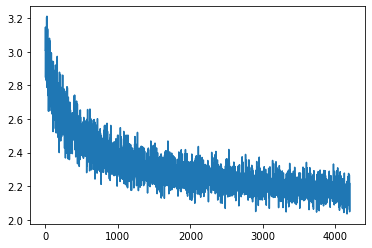

In [121]:
plt.plot(range(len(Loss)),Loss)

In [130]:
### Can we improve this further, should we be declaring parameters? Shouldn't there be abstractions for layers?
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1=nn.Linear(784,3)
        self.sig=nn.Sigmoid()
        self.lin2=nn.Linear(3,10)
        self.softmax=nn.Softmax()
    def forward(self,X):
        x=self.lin1(X)
        x=self.sig(x)
        x=self.lin2(x)
        x=self.softmax(x)
        return x                             

In [132]:
mod=MLP()

In [133]:
import torch.optim as optim

In [134]:
opt=optim.SGD(mod.parameters(),lr=0.1)

In [136]:
Loss=[]
num_epoch=10
for i in range(num_epoch):
    for j,batch in enumerate(mnist_batched):
        x=batch['X']
        Y=batch['y']
        p=mod(x.float())
        loss=CE(p,Y)
        loss.backward()
        Loss.append(loss.item())
        acc=(p.argmax(axis=1)==Y).float().mean().item()
        print(f"Epoch {i+1}, iter {j+1}, loss {loss.item()}, acc {acc}")
        opt.step()
        opt.zero_grad()

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Epoch 1, iter 1, loss 2.463615655899048, acc 0.07000000029802322
Epoch 1, iter 2, loss 2.345031499862671, acc 0.15000000596046448
Epoch 1, iter 3, loss 2.3293352127075195, acc 0.11999999731779099
Epoch 1, iter 4, loss 2.3531954288482666, acc 0.18000000715255737
Epoch 1, iter 5, loss 2.3207666873931885, acc 0.20000000298023224
Epoch 1, iter 6, loss 2.3387107849121094, acc 0.15000000596046448
Epoch 1, iter 7, loss 2.3709189891815186, acc 0.10999999940395355
Epoch 1, iter 8, loss 2.2999656200408936, acc 0.11999999731779099
Epoch 1, iter 9, loss 2.328460931777954, acc 0.11999999731779099
Epoch 1, iter 10, loss 2.3569610118865967, acc 0.11999999731779099
Epoch 1, iter 11, loss 2.337036371231079, acc 0.12999999523162842
Epoch 1, iter 12, loss 2.349637508392334, acc 0.10999999940395355
Epoch 1, iter 13, loss 2.325228691101074, acc 0.12999999523162842
Epoch 1, iter 14, loss 2.3155064582824707, acc 0.10000000149011612
Epoch 1, iter 15, loss 2.290046453475952, acc 0.12999999523162842
Epoch 1, it

Epoch 1, iter 135, loss 2.1499390602111816, acc 0.2199999988079071
Epoch 1, iter 136, loss 2.106266975402832, acc 0.30000001192092896
Epoch 1, iter 137, loss 2.1454198360443115, acc 0.25999999046325684
Epoch 1, iter 138, loss 2.1108155250549316, acc 0.20000000298023224
Epoch 1, iter 139, loss 2.1719255447387695, acc 0.1599999964237213
Epoch 1, iter 140, loss 2.130707025527954, acc 0.27000001072883606
Epoch 1, iter 141, loss 2.158613920211792, acc 0.17000000178813934
Epoch 1, iter 142, loss 2.199760913848877, acc 0.18000000715255737
Epoch 1, iter 143, loss 2.1636910438537598, acc 0.20000000298023224
Epoch 1, iter 144, loss 2.239800214767456, acc 0.18000000715255737
Epoch 1, iter 145, loss 2.1984145641326904, acc 0.20000000298023224
Epoch 1, iter 146, loss 2.2254364490509033, acc 0.20999999344348907
Epoch 1, iter 147, loss 2.208102226257324, acc 0.18000000715255737
Epoch 1, iter 148, loss 2.1782021522521973, acc 0.25
Epoch 1, iter 149, loss 2.1058247089385986, acc 0.27000001072883606
Epo

Epoch 1, iter 263, loss 2.0507280826568604, acc 0.23000000417232513
Epoch 1, iter 264, loss 2.0821681022644043, acc 0.23999999463558197
Epoch 1, iter 265, loss 2.1005218029022217, acc 0.23000000417232513
Epoch 1, iter 266, loss 2.0964393615722656, acc 0.17000000178813934
Epoch 1, iter 267, loss 2.09212589263916, acc 0.2800000011920929
Epoch 1, iter 268, loss 2.1033411026000977, acc 0.12999999523162842
Epoch 1, iter 269, loss 2.073439598083496, acc 0.1899999976158142
Epoch 1, iter 270, loss 2.114832878112793, acc 0.1599999964237213
Epoch 1, iter 271, loss 2.0914759635925293, acc 0.20000000298023224
Epoch 1, iter 272, loss 2.1002118587493896, acc 0.2199999988079071
Epoch 1, iter 273, loss 2.077376365661621, acc 0.20999999344348907
Epoch 1, iter 274, loss 2.069223642349243, acc 0.20999999344348907
Epoch 1, iter 275, loss 2.1091721057891846, acc 0.18000000715255737
Epoch 1, iter 276, loss 2.089747428894043, acc 0.20000000298023224
Epoch 1, iter 277, loss 2.105959892272949, acc 0.2000000029

Epoch 1, iter 420, loss 2.0964696407318115, acc 0.23999999463558197
Epoch 2, iter 1, loss 2.1032614707946777, acc 0.2199999988079071
Epoch 2, iter 2, loss 2.166931390762329, acc 0.18000000715255737
Epoch 2, iter 3, loss 2.0977513790130615, acc 0.1899999976158142
Epoch 2, iter 4, loss 2.1719160079956055, acc 0.17000000178813934
Epoch 2, iter 5, loss 2.1323583126068115, acc 0.17000000178813934
Epoch 2, iter 6, loss 2.142025947570801, acc 0.17000000178813934
Epoch 2, iter 7, loss 2.114553451538086, acc 0.25
Epoch 2, iter 8, loss 2.151906967163086, acc 0.17000000178813934
Epoch 2, iter 9, loss 2.1055104732513428, acc 0.2199999988079071
Epoch 2, iter 10, loss 2.1528453826904297, acc 0.18000000715255737
Epoch 2, iter 11, loss 2.124600887298584, acc 0.20999999344348907
Epoch 2, iter 12, loss 2.0966243743896484, acc 0.20000000298023224
Epoch 2, iter 13, loss 2.0641205310821533, acc 0.18000000715255737
Epoch 2, iter 14, loss 2.090857982635498, acc 0.20999999344348907
Epoch 2, iter 15, loss 1.97

Epoch 2, iter 161, loss 1.9483309984207153, acc 0.20000000298023224
Epoch 2, iter 162, loss 1.9978516101837158, acc 0.28999999165534973
Epoch 2, iter 163, loss 2.0547258853912354, acc 0.1899999976158142
Epoch 2, iter 164, loss 2.0640170574188232, acc 0.1899999976158142
Epoch 2, iter 165, loss 2.1016228199005127, acc 0.2199999988079071
Epoch 2, iter 166, loss 2.04178786277771, acc 0.23999999463558197
Epoch 2, iter 167, loss 2.0187926292419434, acc 0.20999999344348907
Epoch 2, iter 168, loss 2.043358087539673, acc 0.2199999988079071
Epoch 2, iter 169, loss 1.9980711936950684, acc 0.1899999976158142
Epoch 2, iter 170, loss 2.043153762817383, acc 0.12999999523162842
Epoch 2, iter 171, loss 2.0385477542877197, acc 0.17000000178813934
Epoch 2, iter 172, loss 2.0686376094818115, acc 0.17000000178813934
Epoch 2, iter 173, loss 2.038187026977539, acc 0.20000000298023224
Epoch 2, iter 174, loss 2.029637336730957, acc 0.17000000178813934
Epoch 2, iter 175, loss 1.9844534397125244, acc 0.219999998

Epoch 3, iter 28, loss 2.076504945755005, acc 0.2199999988079071
Epoch 3, iter 29, loss 2.0841660499572754, acc 0.20999999344348907
Epoch 3, iter 30, loss 2.1172361373901367, acc 0.20000000298023224
Epoch 3, iter 31, loss 2.1154446601867676, acc 0.11999999731779099
Epoch 3, iter 32, loss 2.1132614612579346, acc 0.1599999964237213
Epoch 3, iter 33, loss 2.038438320159912, acc 0.23000000417232513
Epoch 3, iter 34, loss 2.0632474422454834, acc 0.18000000715255737
Epoch 3, iter 35, loss 2.0115227699279785, acc 0.20999999344348907
Epoch 3, iter 36, loss 2.053785800933838, acc 0.17000000178813934
Epoch 3, iter 37, loss 2.0542500019073486, acc 0.17000000178813934
Epoch 3, iter 38, loss 2.0838325023651123, acc 0.23999999463558197
Epoch 3, iter 39, loss 2.105149269104004, acc 0.1899999976158142
Epoch 3, iter 40, loss 2.0011823177337646, acc 0.20999999344348907
Epoch 3, iter 41, loss 2.0661020278930664, acc 0.15000000596046448
Epoch 3, iter 42, loss 2.053424119949341, acc 0.14000000059604645
Epo

Epoch 3, iter 190, loss 2.0171070098876953, acc 0.20999999344348907
Epoch 3, iter 191, loss 2.0513570308685303, acc 0.20000000298023224
Epoch 3, iter 192, loss 1.9934189319610596, acc 0.2199999988079071
Epoch 3, iter 193, loss 1.929649829864502, acc 0.23999999463558197
Epoch 3, iter 194, loss 1.9207682609558105, acc 0.1899999976158142
Epoch 3, iter 195, loss 1.9271736145019531, acc 0.23999999463558197
Epoch 3, iter 196, loss 2.037628173828125, acc 0.18000000715255737
Epoch 3, iter 197, loss 1.9786763191223145, acc 0.23000000417232513
Epoch 3, iter 198, loss 1.8995187282562256, acc 0.3199999928474426
Epoch 3, iter 199, loss 2.004110813140869, acc 0.20000000298023224
Epoch 3, iter 200, loss 2.027784824371338, acc 0.27000001072883606
Epoch 3, iter 201, loss 1.9766571521759033, acc 0.25
Epoch 3, iter 202, loss 2.0511422157287598, acc 0.18000000715255737
Epoch 3, iter 203, loss 1.9897866249084473, acc 0.12999999523162842
Epoch 3, iter 204, loss 1.9701781272888184, acc 0.25999999046325684
Ep

Epoch 3, iter 333, loss 2.0254249572753906, acc 0.20000000298023224
Epoch 3, iter 334, loss 1.9990061521530151, acc 0.2199999988079071
Epoch 3, iter 335, loss 1.907848834991455, acc 0.25
Epoch 3, iter 336, loss 1.9866925477981567, acc 0.2199999988079071
Epoch 3, iter 337, loss 2.0015881061553955, acc 0.20999999344348907
Epoch 3, iter 338, loss 1.9566845893859863, acc 0.2199999988079071
Epoch 3, iter 339, loss 1.9309636354446411, acc 0.23000000417232513
Epoch 3, iter 340, loss 1.9669550657272339, acc 0.2199999988079071
Epoch 3, iter 341, loss 1.9223612546920776, acc 0.25
Epoch 3, iter 342, loss 2.0086417198181152, acc 0.2199999988079071
Epoch 3, iter 343, loss 1.9559149742126465, acc 0.1899999976158142
Epoch 3, iter 344, loss 1.900915503501892, acc 0.23999999463558197
Epoch 3, iter 345, loss 2.0714025497436523, acc 0.18000000715255737
Epoch 3, iter 346, loss 1.8959970474243164, acc 0.27000001072883606
Epoch 3, iter 347, loss 2.0598626136779785, acc 0.20000000298023224
Epoch 3, iter 348,

Epoch 4, iter 55, loss 2.087292432785034, acc 0.10000000149011612
Epoch 4, iter 56, loss 2.0044546127319336, acc 0.1599999964237213
Epoch 4, iter 57, loss 2.065225124359131, acc 0.1899999976158142
Epoch 4, iter 58, loss 1.9643919467926025, acc 0.1899999976158142
Epoch 4, iter 59, loss 1.9372481107711792, acc 0.23999999463558197
Epoch 4, iter 60, loss 1.9867048263549805, acc 0.2199999988079071
Epoch 4, iter 61, loss 1.9749045372009277, acc 0.17000000178813934
Epoch 4, iter 62, loss 1.9699184894561768, acc 0.20000000298023224
Epoch 4, iter 63, loss 1.9868556261062622, acc 0.23999999463558197
Epoch 4, iter 64, loss 1.966992974281311, acc 0.2199999988079071
Epoch 4, iter 65, loss 1.9976483583450317, acc 0.25999999046325684
Epoch 4, iter 66, loss 1.972436547279358, acc 0.23000000417232513
Epoch 4, iter 67, loss 2.0221245288848877, acc 0.17000000178813934
Epoch 4, iter 68, loss 1.933129906654358, acc 0.30000001192092896
Epoch 4, iter 69, loss 2.015686273574829, acc 0.1899999976158142
Epoch 4

Epoch 4, iter 199, loss 1.9710270166397095, acc 0.20000000298023224
Epoch 4, iter 200, loss 1.9809170961380005, acc 0.27000001072883606
Epoch 4, iter 201, loss 1.9662442207336426, acc 0.25
Epoch 4, iter 202, loss 1.9770264625549316, acc 0.17000000178813934
Epoch 4, iter 203, loss 2.0066072940826416, acc 0.12999999523162842
Epoch 4, iter 204, loss 1.9351868629455566, acc 0.25999999046325684
Epoch 4, iter 205, loss 1.9434186220169067, acc 0.23999999463558197
Epoch 4, iter 206, loss 1.9712648391723633, acc 0.20999999344348907
Epoch 4, iter 207, loss 1.982629418373108, acc 0.1599999964237213
Epoch 4, iter 208, loss 1.968971610069275, acc 0.18000000715255737
Epoch 4, iter 209, loss 2.024862289428711, acc 0.1899999976158142
Epoch 4, iter 210, loss 2.0989584922790527, acc 0.1899999976158142
Epoch 4, iter 211, loss 1.9844639301300049, acc 0.20999999344348907
Epoch 4, iter 212, loss 1.9474895000457764, acc 0.1599999964237213
Epoch 4, iter 213, loss 1.925641655921936, acc 0.20999999344348907
Epo

Epoch 4, iter 337, loss 1.958716869354248, acc 0.20999999344348907
Epoch 4, iter 338, loss 1.9504393339157104, acc 0.2199999988079071
Epoch 4, iter 339, loss 2.0686745643615723, acc 0.20999999344348907
Epoch 4, iter 340, loss 2.0984575748443604, acc 0.1899999976158142
Epoch 4, iter 341, loss 2.0705008506774902, acc 0.23999999463558197
Epoch 4, iter 342, loss 2.0210189819335938, acc 0.23000000417232513
Epoch 4, iter 343, loss 1.9998271465301514, acc 0.1899999976158142
Epoch 4, iter 344, loss 1.9393497705459595, acc 0.23999999463558197
Epoch 4, iter 345, loss 2.016709089279175, acc 0.18000000715255737
Epoch 4, iter 346, loss 1.974117398262024, acc 0.25
Epoch 4, iter 347, loss 2.0863399505615234, acc 0.20000000298023224
Epoch 4, iter 348, loss 1.9547042846679688, acc 0.33000001311302185
Epoch 4, iter 349, loss 1.9276617765426636, acc 0.25999999046325684
Epoch 4, iter 350, loss 2.0093207359313965, acc 0.25
Epoch 4, iter 351, loss 2.032025098800659, acc 0.14000000059604645
Epoch 4, iter 352

Epoch 5, iter 61, loss 1.9082140922546387, acc 0.18000000715255737
Epoch 5, iter 62, loss 1.887639045715332, acc 0.20999999344348907
Epoch 5, iter 63, loss 1.8826653957366943, acc 0.23999999463558197
Epoch 5, iter 64, loss 1.9972021579742432, acc 0.20999999344348907
Epoch 5, iter 65, loss 1.9854086637496948, acc 0.25999999046325684
Epoch 5, iter 66, loss 2.0062754154205322, acc 0.20999999344348907
Epoch 5, iter 67, loss 1.9560096263885498, acc 0.18000000715255737
Epoch 5, iter 68, loss 1.9526249170303345, acc 0.3100000023841858
Epoch 5, iter 69, loss 1.9734506607055664, acc 0.1899999976158142
Epoch 5, iter 70, loss 2.0060501098632812, acc 0.27000001072883606
Epoch 5, iter 71, loss 2.031184196472168, acc 0.17000000178813934
Epoch 5, iter 72, loss 1.956173062324524, acc 0.14000000059604645
Epoch 5, iter 73, loss 2.014749526977539, acc 0.2199999988079071
Epoch 5, iter 74, loss 1.9849761724472046, acc 0.2199999988079071
Epoch 5, iter 75, loss 1.950708270072937, acc 0.12999999523162842
Epoc

Epoch 5, iter 204, loss 1.9139857292175293, acc 0.25999999046325684
Epoch 5, iter 205, loss 1.9030075073242188, acc 0.23000000417232513
Epoch 5, iter 206, loss 1.9800339937210083, acc 0.20999999344348907
Epoch 5, iter 207, loss 2.0392189025878906, acc 0.12999999523162842
Epoch 5, iter 208, loss 1.9763706922531128, acc 0.18000000715255737
Epoch 5, iter 209, loss 2.072882890701294, acc 0.18000000715255737
Epoch 5, iter 210, loss 1.9926865100860596, acc 0.1899999976158142
Epoch 5, iter 211, loss 2.0286262035369873, acc 0.1899999976158142
Epoch 5, iter 212, loss 1.9218899011611938, acc 0.17000000178813934
Epoch 5, iter 213, loss 1.9141441583633423, acc 0.20999999344348907
Epoch 5, iter 214, loss 2.0020697116851807, acc 0.1899999976158142
Epoch 5, iter 215, loss 1.9341617822647095, acc 0.15000000596046448
Epoch 5, iter 216, loss 1.9830734729766846, acc 0.1599999964237213
Epoch 5, iter 217, loss 1.8997677564620972, acc 0.28999999165534973
Epoch 5, iter 218, loss 2.091118097305298, acc 0.2099

Epoch 5, iter 349, loss 1.899083137512207, acc 0.27000001072883606
Epoch 5, iter 350, loss 1.9936363697052002, acc 0.25
Epoch 5, iter 351, loss 1.9034205675125122, acc 0.15000000596046448
Epoch 5, iter 352, loss 1.9297465085983276, acc 0.1899999976158142
Epoch 5, iter 353, loss 1.902488112449646, acc 0.25999999046325684
Epoch 5, iter 354, loss 1.8815263509750366, acc 0.25
Epoch 5, iter 355, loss 1.9256277084350586, acc 0.20000000298023224
Epoch 5, iter 356, loss 1.930181860923767, acc 0.25
Epoch 5, iter 357, loss 1.8997035026550293, acc 0.2199999988079071
Epoch 5, iter 358, loss 2.056602716445923, acc 0.1899999976158142
Epoch 5, iter 359, loss 1.9320881366729736, acc 0.12999999523162842
Epoch 5, iter 360, loss 1.9974621534347534, acc 0.23000000417232513
Epoch 5, iter 361, loss 1.9166582822799683, acc 0.20000000298023224
Epoch 5, iter 362, loss 1.9645183086395264, acc 0.17000000178813934
Epoch 5, iter 363, loss 1.9555816650390625, acc 0.28999999165534973
Epoch 5, iter 364, loss 1.964995

Epoch 6, iter 72, loss 1.906226396560669, acc 0.15000000596046448
Epoch 6, iter 73, loss 1.9872304201126099, acc 0.20999999344348907
Epoch 6, iter 74, loss 1.9882779121398926, acc 0.2199999988079071
Epoch 6, iter 75, loss 1.9280128479003906, acc 0.12999999523162842
Epoch 6, iter 76, loss 2.012934684753418, acc 0.1899999976158142
Epoch 6, iter 77, loss 2.036888360977173, acc 0.1599999964237213
Epoch 6, iter 78, loss 1.9832484722137451, acc 0.2800000011920929
Epoch 6, iter 79, loss 1.9514085054397583, acc 0.20999999344348907
Epoch 6, iter 80, loss 1.9735205173492432, acc 0.20000000298023224
Epoch 6, iter 81, loss 2.0002057552337646, acc 0.1599999964237213
Epoch 6, iter 82, loss 1.9984657764434814, acc 0.1599999964237213
Epoch 6, iter 83, loss 1.9741092920303345, acc 0.20000000298023224
Epoch 6, iter 84, loss 1.968228816986084, acc 0.14000000059604645
Epoch 6, iter 85, loss 1.9806026220321655, acc 0.14000000059604645
Epoch 6, iter 86, loss 1.960784912109375, acc 0.20000000298023224
Epoch 

Epoch 6, iter 211, loss 1.985557198524475, acc 0.20999999344348907
Epoch 6, iter 212, loss 1.9412286281585693, acc 0.1599999964237213
Epoch 6, iter 213, loss 1.9307801723480225, acc 0.1899999976158142
Epoch 6, iter 214, loss 2.0039331912994385, acc 0.1899999976158142
Epoch 6, iter 215, loss 1.9758321046829224, acc 0.12999999523162842
Epoch 6, iter 216, loss 2.049558639526367, acc 0.1599999964237213
Epoch 6, iter 217, loss 1.9256956577301025, acc 0.2800000011920929
Epoch 6, iter 218, loss 2.142388343811035, acc 0.17000000178813934
Epoch 6, iter 219, loss 2.0514464378356934, acc 0.17000000178813934
Epoch 6, iter 220, loss 1.9091984033584595, acc 0.23000000417232513
Epoch 6, iter 221, loss 1.908799409866333, acc 0.18000000715255737
Epoch 6, iter 222, loss 1.9496194124221802, acc 0.20999999344348907
Epoch 6, iter 223, loss 1.932543158531189, acc 0.25999999046325684
Epoch 6, iter 224, loss 1.950854778289795, acc 0.23000000417232513
Epoch 6, iter 225, loss 1.9433958530426025, acc 0.209999993

Epoch 6, iter 353, loss 1.8760560750961304, acc 0.25999999046325684
Epoch 6, iter 354, loss 1.9021300077438354, acc 0.25
Epoch 6, iter 355, loss 1.9128085374832153, acc 0.20999999344348907
Epoch 6, iter 356, loss 1.942359447479248, acc 0.25
Epoch 6, iter 357, loss 1.8890907764434814, acc 0.2199999988079071
Epoch 6, iter 358, loss 2.058234453201294, acc 0.1899999976158142
Epoch 6, iter 359, loss 1.9238284826278687, acc 0.12999999523162842
Epoch 6, iter 360, loss 1.938169002532959, acc 0.23000000417232513
Epoch 6, iter 361, loss 1.9487212896347046, acc 0.20000000298023224
Epoch 6, iter 362, loss 1.9766920804977417, acc 0.17000000178813934
Epoch 6, iter 363, loss 1.9296166896820068, acc 0.28999999165534973
Epoch 6, iter 364, loss 1.9492706060409546, acc 0.12999999523162842
Epoch 6, iter 365, loss 1.9185972213745117, acc 0.20999999344348907
Epoch 6, iter 366, loss 1.8975307941436768, acc 0.25
Epoch 6, iter 367, loss 1.8677892684936523, acc 0.23000000417232513
Epoch 6, iter 368, loss 1.9658

Epoch 7, iter 75, loss 2.004544496536255, acc 0.12999999523162842
Epoch 7, iter 76, loss 2.091007709503174, acc 0.20000000298023224
Epoch 7, iter 77, loss 2.119166612625122, acc 0.1599999964237213
Epoch 7, iter 78, loss 1.9667493104934692, acc 0.28999999165534973
Epoch 7, iter 79, loss 1.9044102430343628, acc 0.23000000417232513
Epoch 7, iter 80, loss 1.9700578451156616, acc 0.20000000298023224
Epoch 7, iter 81, loss 1.9464529752731323, acc 0.17000000178813934
Epoch 7, iter 82, loss 2.0027594566345215, acc 0.1599999964237213
Epoch 7, iter 83, loss 1.8945611715316772, acc 0.2199999988079071
Epoch 7, iter 84, loss 1.9365365505218506, acc 0.15000000596046448
Epoch 7, iter 85, loss 1.9474443197250366, acc 0.1599999964237213
Epoch 7, iter 86, loss 1.8505847454071045, acc 0.20999999344348907
Epoch 7, iter 87, loss 2.0344715118408203, acc 0.25
Epoch 7, iter 88, loss 1.9216712713241577, acc 0.25999999046325684
Epoch 7, iter 89, loss 1.956802248954773, acc 0.20000000298023224
Epoch 7, iter 90, 

Epoch 7, iter 219, loss 2.0525970458984375, acc 0.17000000178813934
Epoch 7, iter 220, loss 1.9048657417297363, acc 0.23000000417232513
Epoch 7, iter 221, loss 1.9352521896362305, acc 0.18000000715255737
Epoch 7, iter 222, loss 1.9192184209823608, acc 0.20999999344348907
Epoch 7, iter 223, loss 1.92283296585083, acc 0.27000001072883606
Epoch 7, iter 224, loss 1.9196877479553223, acc 0.23000000417232513
Epoch 7, iter 225, loss 1.9242770671844482, acc 0.2199999988079071
Epoch 7, iter 226, loss 2.001278877258301, acc 0.23000000417232513
Epoch 7, iter 227, loss 1.9874800443649292, acc 0.23999999463558197
Epoch 7, iter 228, loss 2.0059762001037598, acc 0.20000000298023224
Epoch 7, iter 229, loss 1.8629286289215088, acc 0.2199999988079071
Epoch 7, iter 230, loss 2.0005993843078613, acc 0.25
Epoch 7, iter 231, loss 2.0286142826080322, acc 0.2199999988079071
Epoch 7, iter 232, loss 1.9965484142303467, acc 0.15000000596046448
Epoch 7, iter 233, loss 1.9975405931472778, acc 0.23999999463558197
E

Epoch 7, iter 364, loss 1.9753433465957642, acc 0.11999999731779099
Epoch 7, iter 365, loss 1.982981562614441, acc 0.18000000715255737
Epoch 7, iter 366, loss 1.924826979637146, acc 0.23999999463558197
Epoch 7, iter 367, loss 1.899001955986023, acc 0.2199999988079071
Epoch 7, iter 368, loss 1.9544700384140015, acc 0.23000000417232513
Epoch 7, iter 369, loss 1.871389627456665, acc 0.23999999463558197
Epoch 7, iter 370, loss 1.9105724096298218, acc 0.20999999344348907
Epoch 7, iter 371, loss 2.0038137435913086, acc 0.23999999463558197
Epoch 7, iter 372, loss 1.8804807662963867, acc 0.23000000417232513
Epoch 7, iter 373, loss 1.9298145771026611, acc 0.17000000178813934
Epoch 7, iter 374, loss 2.0428686141967773, acc 0.1899999976158142
Epoch 7, iter 375, loss 1.9500950574874878, acc 0.2800000011920929
Epoch 7, iter 376, loss 1.9237258434295654, acc 0.15000000596046448
Epoch 7, iter 377, loss 1.9389662742614746, acc 0.25999999046325684
Epoch 7, iter 378, loss 1.8981294631958008, acc 0.23999

Epoch 8, iter 84, loss 1.9670356512069702, acc 0.12999999523162842
Epoch 8, iter 85, loss 1.9587492942810059, acc 0.14000000059604645
Epoch 8, iter 86, loss 1.924115777015686, acc 0.20000000298023224
Epoch 8, iter 87, loss 1.9714601039886475, acc 0.17000000178813934
Epoch 8, iter 88, loss 1.9820666313171387, acc 0.23999999463558197
Epoch 8, iter 89, loss 1.9107131958007812, acc 0.1899999976158142
Epoch 8, iter 90, loss 1.9105383157730103, acc 0.1899999976158142
Epoch 8, iter 91, loss 1.9848296642303467, acc 0.18000000715255737
Epoch 8, iter 92, loss 1.9476245641708374, acc 0.15000000596046448
Epoch 8, iter 93, loss 1.9458884000778198, acc 0.2199999988079071
Epoch 8, iter 94, loss 1.9499191045761108, acc 0.1599999964237213
Epoch 8, iter 95, loss 1.942905068397522, acc 0.1899999976158142
Epoch 8, iter 96, loss 1.953398585319519, acc 0.2199999988079071
Epoch 8, iter 97, loss 1.9333289861679077, acc 0.10999999940395355
Epoch 8, iter 98, loss 1.9068129062652588, acc 0.1899999976158142
Epoch

Epoch 8, iter 226, loss 1.9888325929641724, acc 0.23999999463558197
Epoch 8, iter 227, loss 1.9743008613586426, acc 0.23999999463558197
Epoch 8, iter 228, loss 1.9746642112731934, acc 0.20000000298023224
Epoch 8, iter 229, loss 2.010215997695923, acc 0.2199999988079071
Epoch 8, iter 230, loss 2.0257339477539062, acc 0.25999999046325684
Epoch 8, iter 231, loss 2.0180771350860596, acc 0.2199999988079071
Epoch 8, iter 232, loss 2.083641529083252, acc 0.15000000596046448
Epoch 8, iter 233, loss 1.913886308670044, acc 0.25
Epoch 8, iter 234, loss 1.9202630519866943, acc 0.27000001072883606
Epoch 8, iter 235, loss 1.9103422164916992, acc 0.23000000417232513
Epoch 8, iter 236, loss 1.9800513982772827, acc 0.17000000178813934
Epoch 8, iter 237, loss 1.9951767921447754, acc 0.1899999976158142
Epoch 8, iter 238, loss 1.9674949645996094, acc 0.2199999988079071
Epoch 8, iter 239, loss 1.928490400314331, acc 0.15000000596046448
Epoch 8, iter 240, loss 1.921526312828064, acc 0.17000000178813934
Epoc

Epoch 8, iter 367, loss 1.9286396503448486, acc 0.2199999988079071
Epoch 8, iter 368, loss 1.951483130455017, acc 0.23000000417232513
Epoch 8, iter 369, loss 1.9111313819885254, acc 0.23999999463558197
Epoch 8, iter 370, loss 1.9190043210983276, acc 0.20000000298023224
Epoch 8, iter 371, loss 1.9763953685760498, acc 0.23999999463558197
Epoch 8, iter 372, loss 1.8596465587615967, acc 0.23000000417232513
Epoch 8, iter 373, loss 1.9179664850234985, acc 0.17000000178813934
Epoch 8, iter 374, loss 2.0502126216888428, acc 0.20000000298023224
Epoch 8, iter 375, loss 1.930704951286316, acc 0.28999999165534973
Epoch 8, iter 376, loss 1.9142773151397705, acc 0.15000000596046448
Epoch 8, iter 377, loss 1.900701880455017, acc 0.25999999046325684
Epoch 8, iter 378, loss 1.9273695945739746, acc 0.25
Epoch 8, iter 379, loss 1.9387151002883911, acc 0.18000000715255737
Epoch 8, iter 380, loss 1.988766074180603, acc 0.15000000596046448
Epoch 8, iter 381, loss 1.9529178142547607, acc 0.1599999964237213
E

Epoch 9, iter 86, loss 1.9285366535186768, acc 0.20999999344348907
Epoch 9, iter 87, loss 1.9494867324829102, acc 0.17000000178813934
Epoch 9, iter 88, loss 1.9922795295715332, acc 0.25999999046325684
Epoch 9, iter 89, loss 1.9915353059768677, acc 0.20999999344348907
Epoch 9, iter 90, loss 1.9323935508728027, acc 0.2199999988079071
Epoch 9, iter 91, loss 1.983890414237976, acc 0.20999999344348907
Epoch 9, iter 92, loss 1.890851616859436, acc 0.15000000596046448
Epoch 9, iter 93, loss 1.896173357963562, acc 0.17000000178813934
Epoch 9, iter 94, loss 1.91591477394104, acc 0.1599999964237213
Epoch 9, iter 95, loss 1.9473124742507935, acc 0.23999999463558197
Epoch 9, iter 96, loss 1.9628597497940063, acc 0.1899999976158142
Epoch 9, iter 97, loss 1.9386345148086548, acc 0.20999999344348907
Epoch 9, iter 98, loss 1.9437974691390991, acc 0.1899999976158142
Epoch 9, iter 99, loss 1.9840489625930786, acc 0.1599999964237213
Epoch 9, iter 100, loss 1.9779481887817383, acc 0.2199999988079071
Epoch

Epoch 9, iter 220, loss 1.9602911472320557, acc 0.1599999964237213
Epoch 9, iter 221, loss 1.914015769958496, acc 0.1899999976158142
Epoch 9, iter 222, loss 1.9978508949279785, acc 0.20999999344348907
Epoch 9, iter 223, loss 1.864687204360962, acc 0.17000000178813934
Epoch 9, iter 224, loss 1.9421050548553467, acc 0.23999999463558197
Epoch 9, iter 225, loss 1.8579825162887573, acc 0.23000000417232513
Epoch 9, iter 226, loss 1.9145070314407349, acc 0.25
Epoch 9, iter 227, loss 1.987958550453186, acc 0.23999999463558197
Epoch 9, iter 228, loss 1.9408305883407593, acc 0.20000000298023224
Epoch 9, iter 229, loss 1.9346673488616943, acc 0.2199999988079071
Epoch 9, iter 230, loss 2.0217461585998535, acc 0.25
Epoch 9, iter 231, loss 2.0540642738342285, acc 0.2199999988079071
Epoch 9, iter 232, loss 2.057734489440918, acc 0.15000000596046448
Epoch 9, iter 233, loss 1.9163321256637573, acc 0.25
Epoch 9, iter 234, loss 1.8564845323562622, acc 0.2800000011920929
Epoch 9, iter 235, loss 1.86324679

Epoch 9, iter 387, loss 1.9548661708831787, acc 0.2199999988079071
Epoch 9, iter 388, loss 1.9230811595916748, acc 0.20000000298023224
Epoch 9, iter 389, loss 1.8973993062973022, acc 0.20999999344348907
Epoch 9, iter 390, loss 2.032564163208008, acc 0.10000000149011612
Epoch 9, iter 391, loss 1.9345974922180176, acc 0.1899999976158142
Epoch 9, iter 392, loss 1.9071760177612305, acc 0.18000000715255737
Epoch 9, iter 393, loss 2.0152502059936523, acc 0.15000000596046448
Epoch 9, iter 394, loss 1.8105322122573853, acc 0.25999999046325684
Epoch 9, iter 395, loss 1.9602192640304565, acc 0.27000001072883606
Epoch 9, iter 396, loss 1.9392194747924805, acc 0.15000000596046448
Epoch 9, iter 397, loss 1.8745391368865967, acc 0.20000000298023224
Epoch 9, iter 398, loss 2.005418539047241, acc 0.12999999523162842
Epoch 9, iter 399, loss 1.8891340494155884, acc 0.23999999463558197
Epoch 9, iter 400, loss 1.8432787656784058, acc 0.28999999165534973
Epoch 9, iter 401, loss 1.8694037199020386, acc 0.20

Epoch 10, iter 93, loss 1.929071068763733, acc 0.2199999988079071
Epoch 10, iter 94, loss 1.8725265264511108, acc 0.1599999964237213
Epoch 10, iter 95, loss 1.9454584121704102, acc 0.1899999976158142
Epoch 10, iter 96, loss 1.9179925918579102, acc 0.2199999988079071
Epoch 10, iter 97, loss 1.9506335258483887, acc 0.10999999940395355
Epoch 10, iter 98, loss 1.899953007698059, acc 0.18000000715255737
Epoch 10, iter 99, loss 1.996575951576233, acc 0.1599999964237213
Epoch 10, iter 100, loss 1.9578449726104736, acc 0.23999999463558197
Epoch 10, iter 101, loss 1.9020999670028687, acc 0.2199999988079071
Epoch 10, iter 102, loss 2.038090705871582, acc 0.23000000417232513
Epoch 10, iter 103, loss 1.9843761920928955, acc 0.23999999463558197
Epoch 10, iter 104, loss 2.009354829788208, acc 0.2800000011920929
Epoch 10, iter 105, loss 1.8341935873031616, acc 0.1899999976158142
Epoch 10, iter 106, loss 1.8391281366348267, acc 0.25999999046325684
Epoch 10, iter 107, loss 1.9701662063598633, acc 0.219

Epoch 10, iter 217, loss 1.8355532884597778, acc 0.20999999344348907
Epoch 10, iter 218, loss 2.0524165630340576, acc 0.15000000596046448
Epoch 10, iter 219, loss 2.012756824493408, acc 0.1599999964237213
Epoch 10, iter 220, loss 1.9423762559890747, acc 0.1599999964237213
Epoch 10, iter 221, loss 1.8519364595413208, acc 0.18000000715255737
Epoch 10, iter 222, loss 1.928844928741455, acc 0.20999999344348907
Epoch 10, iter 223, loss 1.9163936376571655, acc 0.27000001072883606
Epoch 10, iter 224, loss 1.8755031824111938, acc 0.23999999463558197
Epoch 10, iter 225, loss 1.8735268115997314, acc 0.2199999988079071
Epoch 10, iter 226, loss 1.9069552421569824, acc 0.23999999463558197
Epoch 10, iter 227, loss 1.9613969326019287, acc 0.23999999463558197
Epoch 10, iter 228, loss 1.9450031518936157, acc 0.1899999976158142
Epoch 10, iter 229, loss 1.8856897354125977, acc 0.20999999344348907
Epoch 10, iter 230, loss 2.001882553100586, acc 0.23999999463558197
Epoch 10, iter 231, loss 2.06977486610412

Epoch 10, iter 341, loss 1.8972057104110718, acc 0.25
Epoch 10, iter 342, loss 2.002013921737671, acc 0.23000000417232513
Epoch 10, iter 343, loss 1.9470114707946777, acc 0.1899999976158142
Epoch 10, iter 344, loss 1.9121705293655396, acc 0.27000001072883606
Epoch 10, iter 345, loss 1.937361717224121, acc 0.1899999976158142
Epoch 10, iter 346, loss 1.973631739616394, acc 0.25999999046325684
Epoch 10, iter 347, loss 1.9576022624969482, acc 0.17000000178813934
Epoch 10, iter 348, loss 1.9956932067871094, acc 0.25
Epoch 10, iter 349, loss 2.0254149436950684, acc 0.23000000417232513
Epoch 10, iter 350, loss 1.9843045473098755, acc 0.18000000715255737
Epoch 10, iter 351, loss 2.1157195568084717, acc 0.11999999731779099
Epoch 10, iter 352, loss 1.9463441371917725, acc 0.1899999976158142
Epoch 10, iter 353, loss 1.9671391248703003, acc 0.14000000059604645
Epoch 10, iter 354, loss 2.022249460220337, acc 0.25
Epoch 10, iter 355, loss 1.9991642236709595, acc 0.1899999976158142
Epoch 10, iter 356

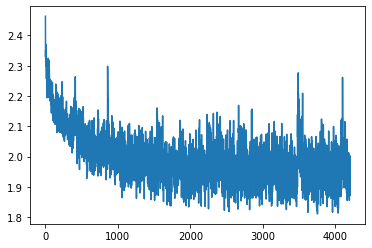

In [137]:
plt.plot(range(len(Loss)),Loss)

In [138]:
## We can make one last change, instead of defining a loss function ourselves we will use a predifined one

In [139]:
criterion=torch.nn.CrossEntropyLoss()

In [140]:
mod=MLP()
opt=optim.SGD(mod.parameters(),lr=0.1)
Loss=[]
num_epoch=10
for i in range(num_epoch):
    for j,batch in enumerate(mnist_batched):
        x=batch['X']
        Y=batch['y']
        p=mod(x.float())
        loss=criterion(p,Y)
        loss.backward()
        Loss.append(loss.item())
        acc=(p.argmax(axis=1)==Y).float().mean().item()
        print(f"Epoch {i+1}, iter {j+1}, loss {loss.item()}, acc {acc}")
        opt.step()
        opt.zero_grad()

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Epoch 1, iter 1, loss 2.298886299133301, acc 0.05000000074505806
Epoch 1, iter 2, loss 2.299427032470703, acc 0.07000000029802322
Epoch 1, iter 3, loss 2.2928478717803955, acc 0.03999999910593033
Epoch 1, iter 4, loss 2.3054468631744385, acc 0.05999999865889549
Epoch 1, iter 5, loss 2.3021371364593506, acc 0.07000000029802322
Epoch 1, iter 6, loss 2.307072639465332, acc 0.07000000029802322
Epoch 1, iter 7, loss 2.3009884357452393, acc 0.019999999552965164
Epoch 1, iter 8, loss 2.297549247741699, acc 0.05999999865889549
Epoch 1, iter 9, loss 2.2971537113189697, acc 0.07999999821186066
Epoch 1, iter 10, loss 2.3003745079040527, acc 0.05000000074505806
Epoch 1, iter 11, loss 2.3002185821533203, acc 0.09000000357627869
Epoch 1, iter 12, loss 2.3004846572875977, acc 0.07999999821186066
Epoch 1, iter 13, loss 2.299527645111084, acc 0.07000000029802322
Epoch 1, iter 14, loss 2.2902917861938477, acc 0.09000000357627869
Epoch 1, iter 15, loss 2.282951831817627, acc 0.07000000029802322
Epoch 1, 

Epoch 1, iter 136, loss 2.2618229389190674, acc 0.2800000011920929
Epoch 1, iter 137, loss 2.270925760269165, acc 0.23999999463558197
Epoch 1, iter 138, loss 2.2713394165039062, acc 0.20000000298023224
Epoch 1, iter 139, loss 2.2759249210357666, acc 0.20999999344348907
Epoch 1, iter 140, loss 2.2728729248046875, acc 0.1899999976158142
Epoch 1, iter 141, loss 2.2730295658111572, acc 0.2199999988079071
Epoch 1, iter 142, loss 2.2782890796661377, acc 0.17000000178813934
Epoch 1, iter 143, loss 2.2749152183532715, acc 0.1899999976158142
Epoch 1, iter 144, loss 2.2770655155181885, acc 0.1599999964237213
Epoch 1, iter 145, loss 2.271343231201172, acc 0.1899999976158142
Epoch 1, iter 146, loss 2.270331621170044, acc 0.1899999976158142
Epoch 1, iter 147, loss 2.2738327980041504, acc 0.20999999344348907
Epoch 1, iter 148, loss 2.262932777404785, acc 0.25
Epoch 1, iter 149, loss 2.263397216796875, acc 0.23000000417232513
Epoch 1, iter 150, loss 2.2716214656829834, acc 0.23999999463558197
Epoch 1

Epoch 1, iter 301, loss 2.2532949447631836, acc 0.1899999976158142
Epoch 1, iter 302, loss 2.239081382751465, acc 0.23000000417232513
Epoch 1, iter 303, loss 2.250300645828247, acc 0.25999999046325684
Epoch 1, iter 304, loss 2.266481876373291, acc 0.1599999964237213
Epoch 1, iter 305, loss 2.2697014808654785, acc 0.2199999988079071
Epoch 1, iter 306, loss 2.240532636642456, acc 0.25
Epoch 1, iter 307, loss 2.2471399307250977, acc 0.20999999344348907
Epoch 1, iter 308, loss 2.2627313137054443, acc 0.23000000417232513
Epoch 1, iter 309, loss 2.2552289962768555, acc 0.15000000596046448
Epoch 1, iter 310, loss 2.2569339275360107, acc 0.18000000715255737
Epoch 1, iter 311, loss 2.244062900543213, acc 0.20000000298023224
Epoch 1, iter 312, loss 2.236319065093994, acc 0.27000001072883606
Epoch 1, iter 313, loss 2.276365041732788, acc 0.11999999731779099
Epoch 1, iter 314, loss 2.222223997116089, acc 0.27000001072883606
Epoch 1, iter 315, loss 2.2438788414001465, acc 0.23000000417232513
Epoch 

Epoch 2, iter 14, loss 2.2213051319122314, acc 0.36000001430511475
Epoch 2, iter 15, loss 2.1852567195892334, acc 0.3100000023841858
Epoch 2, iter 16, loss 2.2244651317596436, acc 0.3400000035762787
Epoch 2, iter 17, loss 2.2407281398773193, acc 0.23999999463558197
Epoch 2, iter 18, loss 2.242586612701416, acc 0.28999999165534973
Epoch 2, iter 19, loss 2.2213294506073, acc 0.33000001311302185
Epoch 2, iter 20, loss 2.2161638736724854, acc 0.3100000023841858
Epoch 2, iter 21, loss 2.2018611431121826, acc 0.3199999928474426
Epoch 2, iter 22, loss 2.2338058948516846, acc 0.28999999165534973
Epoch 2, iter 23, loss 2.1980414390563965, acc 0.30000001192092896
Epoch 2, iter 24, loss 2.2130985260009766, acc 0.3199999928474426
Epoch 2, iter 25, loss 2.2403526306152344, acc 0.25
Epoch 2, iter 26, loss 2.231159210205078, acc 0.25999999046325684
Epoch 2, iter 27, loss 2.22407865524292, acc 0.25999999046325684
Epoch 2, iter 28, loss 2.200789213180542, acc 0.3400000035762787
Epoch 2, iter 29, loss 2

Epoch 2, iter 162, loss 2.1709372997283936, acc 0.3100000023841858
Epoch 2, iter 163, loss 2.234861373901367, acc 0.25
Epoch 2, iter 164, loss 2.226963758468628, acc 0.25999999046325684
Epoch 2, iter 165, loss 2.2459375858306885, acc 0.18000000715255737
Epoch 2, iter 166, loss 2.1970341205596924, acc 0.3100000023841858
Epoch 2, iter 167, loss 2.218292474746704, acc 0.25999999046325684
Epoch 2, iter 168, loss 2.2043957710266113, acc 0.3100000023841858
Epoch 2, iter 169, loss 2.177980661392212, acc 0.3700000047683716
Epoch 2, iter 170, loss 2.226067066192627, acc 0.28999999165534973
Epoch 2, iter 171, loss 2.2243170738220215, acc 0.2800000011920929
Epoch 2, iter 172, loss 2.235614061355591, acc 0.27000001072883606
Epoch 2, iter 173, loss 2.2390940189361572, acc 0.2199999988079071
Epoch 2, iter 174, loss 2.2041430473327637, acc 0.27000001072883606
Epoch 2, iter 175, loss 2.21201491355896, acc 0.27000001072883606
Epoch 2, iter 176, loss 2.247291088104248, acc 0.2199999988079071
Epoch 2, it

Epoch 2, iter 307, loss 2.18168568611145, acc 0.27000001072883606
Epoch 2, iter 308, loss 2.228576898574829, acc 0.15000000596046448
Epoch 2, iter 309, loss 2.2124359607696533, acc 0.20000000298023224
Epoch 2, iter 310, loss 2.2099668979644775, acc 0.20000000298023224
Epoch 2, iter 311, loss 2.1900384426116943, acc 0.23000000417232513
Epoch 2, iter 312, loss 2.1808958053588867, acc 0.20000000298023224
Epoch 2, iter 313, loss 2.2496557235717773, acc 0.10999999940395355
Epoch 2, iter 314, loss 2.1595537662506104, acc 0.25
Epoch 2, iter 315, loss 2.1994926929473877, acc 0.1899999976158142
Epoch 2, iter 316, loss 2.234776020050049, acc 0.18000000715255737
Epoch 2, iter 317, loss 2.2166831493377686, acc 0.2199999988079071
Epoch 2, iter 318, loss 2.1887547969818115, acc 0.23000000417232513
Epoch 2, iter 319, loss 2.2076609134674072, acc 0.2199999988079071
Epoch 2, iter 320, loss 2.2565319538116455, acc 0.07999999821186066
Epoch 2, iter 321, loss 2.2231786251068115, acc 0.20000000298023224
Ep

Epoch 3, iter 41, loss 2.2294507026672363, acc 0.1599999964237213
Epoch 3, iter 42, loss 2.1990342140197754, acc 0.20000000298023224
Epoch 3, iter 43, loss 2.15263295173645, acc 0.27000001072883606
Epoch 3, iter 44, loss 2.151308536529541, acc 0.25999999046325684
Epoch 3, iter 45, loss 2.2041783332824707, acc 0.18000000715255737
Epoch 3, iter 46, loss 2.1925554275512695, acc 0.18000000715255737
Epoch 3, iter 47, loss 2.212899684906006, acc 0.17000000178813934
Epoch 3, iter 48, loss 2.1666438579559326, acc 0.27000001072883606
Epoch 3, iter 49, loss 2.1717936992645264, acc 0.23000000417232513
Epoch 3, iter 50, loss 2.20706844329834, acc 0.1899999976158142
Epoch 3, iter 51, loss 2.168907880783081, acc 0.23999999463558197
Epoch 3, iter 52, loss 2.2107503414154053, acc 0.18000000715255737
Epoch 3, iter 53, loss 2.1601974964141846, acc 0.23000000417232513
Epoch 3, iter 54, loss 2.1869633197784424, acc 0.20999999344348907
Epoch 3, iter 55, loss 2.25811505317688, acc 0.10000000149011612
Epoch 

Epoch 3, iter 188, loss 2.1926822662353516, acc 0.20999999344348907
Epoch 3, iter 189, loss 2.2475881576538086, acc 0.14000000059604645
Epoch 3, iter 190, loss 2.179173469543457, acc 0.3199999928474426
Epoch 3, iter 191, loss 2.189999580383301, acc 0.25999999046325684
Epoch 3, iter 192, loss 2.1751606464385986, acc 0.25999999046325684
Epoch 3, iter 193, loss 2.1601858139038086, acc 0.3100000023841858
Epoch 3, iter 194, loss 2.180999994277954, acc 0.23999999463558197
Epoch 3, iter 195, loss 2.1271326541900635, acc 0.3700000047683716
Epoch 3, iter 196, loss 2.211932897567749, acc 0.23999999463558197
Epoch 3, iter 197, loss 2.1799967288970947, acc 0.33000001311302185
Epoch 3, iter 198, loss 2.11340594291687, acc 0.3799999952316284
Epoch 3, iter 199, loss 2.182547092437744, acc 0.27000001072883606
Epoch 3, iter 200, loss 2.188427209854126, acc 0.30000001192092896
Epoch 3, iter 201, loss 2.168304204940796, acc 0.3199999928474426
Epoch 3, iter 202, loss 2.1709835529327393, acc 0.25
Epoch 3, 

Epoch 3, iter 335, loss 2.109499454498291, acc 0.36000001430511475
Epoch 3, iter 336, loss 2.162052869796753, acc 0.3100000023841858
Epoch 3, iter 337, loss 2.1889450550079346, acc 0.23999999463558197
Epoch 3, iter 338, loss 2.1610045433044434, acc 0.3100000023841858
Epoch 3, iter 339, loss 2.1890087127685547, acc 0.25
Epoch 3, iter 340, loss 2.1878600120544434, acc 0.28999999165534973
Epoch 3, iter 341, loss 2.159515142440796, acc 0.2800000011920929
Epoch 3, iter 342, loss 2.161776542663574, acc 0.30000001192092896
Epoch 3, iter 343, loss 2.2108113765716553, acc 0.23999999463558197
Epoch 3, iter 344, loss 2.1336944103240967, acc 0.33000001311302185
Epoch 3, iter 345, loss 2.207810401916504, acc 0.2199999988079071
Epoch 3, iter 346, loss 2.118921995162964, acc 0.3499999940395355
Epoch 3, iter 347, loss 2.2221524715423584, acc 0.23000000417232513
Epoch 3, iter 348, loss 2.1409361362457275, acc 0.3700000047683716
Epoch 3, iter 349, loss 2.1113121509552, acc 0.38999998569488525
Epoch 3, i

Epoch 4, iter 61, loss 2.1582674980163574, acc 0.2800000011920929
Epoch 4, iter 62, loss 2.1678524017333984, acc 0.2800000011920929
Epoch 4, iter 63, loss 2.194559335708618, acc 0.2800000011920929
Epoch 4, iter 64, loss 2.145280361175537, acc 0.25
Epoch 4, iter 65, loss 2.1737444400787354, acc 0.3199999928474426
Epoch 4, iter 66, loss 2.1485369205474854, acc 0.2800000011920929
Epoch 4, iter 67, loss 2.178328037261963, acc 0.28999999165534973
Epoch 4, iter 68, loss 2.134901523590088, acc 0.3199999928474426
Epoch 4, iter 69, loss 2.1644856929779053, acc 0.2800000011920929
Epoch 4, iter 70, loss 2.1688787937164307, acc 0.3100000023841858
Epoch 4, iter 71, loss 2.1828293800354004, acc 0.27000001072883606
Epoch 4, iter 72, loss 2.1559417247772217, acc 0.23999999463558197
Epoch 4, iter 73, loss 2.1443581581115723, acc 0.3199999928474426
Epoch 4, iter 74, loss 2.1678848266601562, acc 0.27000001072883606
Epoch 4, iter 75, loss 2.1640377044677734, acc 0.23999999463558197
Epoch 4, iter 76, loss 

Epoch 4, iter 204, loss 2.1306324005126953, acc 0.3700000047683716
Epoch 4, iter 205, loss 2.0943803787231445, acc 0.36000001430511475
Epoch 4, iter 206, loss 2.163205146789551, acc 0.23000000417232513
Epoch 4, iter 207, loss 2.1755075454711914, acc 0.27000001072883606
Epoch 4, iter 208, loss 2.200956344604492, acc 0.25999999046325684
Epoch 4, iter 209, loss 2.1980104446411133, acc 0.23000000417232513
Epoch 4, iter 210, loss 2.2076849937438965, acc 0.20000000298023224
Epoch 4, iter 211, loss 2.1516594886779785, acc 0.28999999165534973
Epoch 4, iter 212, loss 2.1845247745513916, acc 0.23000000417232513
Epoch 4, iter 213, loss 2.1771907806396484, acc 0.28999999165534973
Epoch 4, iter 214, loss 2.18963623046875, acc 0.27000001072883606
Epoch 4, iter 215, loss 2.1661362648010254, acc 0.23000000417232513
Epoch 4, iter 216, loss 2.1941394805908203, acc 0.20000000298023224
Epoch 4, iter 217, loss 2.135535478591919, acc 0.36000001430511475
Epoch 4, iter 218, loss 2.2233998775482178, acc 0.2599

Epoch 4, iter 349, loss 2.0905425548553467, acc 0.3799999952316284
Epoch 4, iter 350, loss 2.167222738265991, acc 0.28999999165534973
Epoch 4, iter 351, loss 2.1460366249084473, acc 0.30000001192092896
Epoch 4, iter 352, loss 2.16204833984375, acc 0.2800000011920929
Epoch 4, iter 353, loss 2.1637632846832275, acc 0.38999998569488525
Epoch 4, iter 354, loss 2.121244430541992, acc 0.3799999952316284
Epoch 4, iter 355, loss 2.1839029788970947, acc 0.25999999046325684
Epoch 4, iter 356, loss 2.175370693206787, acc 0.28999999165534973
Epoch 4, iter 357, loss 2.172703504562378, acc 0.28999999165534973
Epoch 4, iter 358, loss 2.217259407043457, acc 0.2199999988079071
Epoch 4, iter 359, loss 2.1664068698883057, acc 0.25999999046325684
Epoch 4, iter 360, loss 2.158282518386841, acc 0.2800000011920929
Epoch 4, iter 361, loss 2.137383222579956, acc 0.33000001311302185
Epoch 4, iter 362, loss 2.2045254707336426, acc 0.23000000417232513
Epoch 4, iter 363, loss 2.139190912246704, acc 0.3400000035762

Epoch 5, iter 75, loss 2.1530580520629883, acc 0.3499999940395355
Epoch 5, iter 76, loss 2.15755558013916, acc 0.3199999928474426
Epoch 5, iter 77, loss 2.1940903663635254, acc 0.3400000035762787
Epoch 5, iter 78, loss 2.1607534885406494, acc 0.3799999952316284
Epoch 5, iter 79, loss 2.142428159713745, acc 0.4000000059604645
Epoch 5, iter 80, loss 2.1337730884552, acc 0.3199999928474426
Epoch 5, iter 81, loss 2.1783149242401123, acc 0.33000001311302185
Epoch 5, iter 82, loss 2.1705031394958496, acc 0.33000001311302185
Epoch 5, iter 83, loss 2.130507707595825, acc 0.3799999952316284
Epoch 5, iter 84, loss 2.1768839359283447, acc 0.28999999165534973
Epoch 5, iter 85, loss 2.2004342079162598, acc 0.27000001072883606
Epoch 5, iter 86, loss 2.141761541366577, acc 0.4000000059604645
Epoch 5, iter 87, loss 2.1620099544525146, acc 0.3499999940395355
Epoch 5, iter 88, loss 2.1251909732818604, acc 0.4099999964237213
Epoch 5, iter 89, loss 2.1618874073028564, acc 0.36000001430511475
Epoch 5, iter

Epoch 5, iter 224, loss 2.1795742511749268, acc 0.3400000035762787
Epoch 5, iter 225, loss 2.1328530311584473, acc 0.3400000035762787
Epoch 5, iter 226, loss 2.133901357650757, acc 0.36000001430511475
Epoch 5, iter 227, loss 2.148252248764038, acc 0.3799999952316284
Epoch 5, iter 228, loss 2.1515603065490723, acc 0.3100000023841858
Epoch 5, iter 229, loss 2.1257948875427246, acc 0.4000000059604645
Epoch 5, iter 230, loss 2.1276164054870605, acc 0.3700000047683716
Epoch 5, iter 231, loss 2.113593339920044, acc 0.4300000071525574
Epoch 5, iter 232, loss 2.1635892391204834, acc 0.33000001311302185
Epoch 5, iter 233, loss 2.104407548904419, acc 0.3700000047683716
Epoch 5, iter 234, loss 2.102616310119629, acc 0.46000000834465027
Epoch 5, iter 235, loss 2.1287856101989746, acc 0.4300000071525574
Epoch 5, iter 236, loss 2.1548216342926025, acc 0.33000001311302185
Epoch 5, iter 237, loss 2.190707206726074, acc 0.28999999165534973
Epoch 5, iter 238, loss 2.142293691635132, acc 0.37000000476837

Epoch 5, iter 358, loss 2.2086846828460693, acc 0.27000001072883606
Epoch 5, iter 359, loss 2.1482715606689453, acc 0.38999998569488525
Epoch 5, iter 360, loss 2.1458523273468018, acc 0.3700000047683716
Epoch 5, iter 361, loss 2.128235101699829, acc 0.36000001430511475
Epoch 5, iter 362, loss 2.185542345046997, acc 0.3199999928474426
Epoch 5, iter 363, loss 2.1391167640686035, acc 0.4099999964237213
Epoch 5, iter 364, loss 2.141211986541748, acc 0.3100000023841858
Epoch 5, iter 365, loss 2.1154513359069824, acc 0.4000000059604645
Epoch 5, iter 366, loss 2.0937047004699707, acc 0.36000001430511475
Epoch 5, iter 367, loss 2.1145148277282715, acc 0.38999998569488525
Epoch 5, iter 368, loss 2.10990834236145, acc 0.4300000071525574
Epoch 5, iter 369, loss 2.125741958618164, acc 0.38999998569488525
Epoch 5, iter 370, loss 2.097196102142334, acc 0.4300000071525574
Epoch 5, iter 371, loss 2.0928914546966553, acc 0.41999998688697815
Epoch 5, iter 372, loss 2.136306047439575, acc 0.3600000143051

Epoch 6, iter 66, loss 2.119436025619507, acc 0.4099999964237213
Epoch 6, iter 67, loss 2.156599521636963, acc 0.3799999952316284
Epoch 6, iter 68, loss 2.1225388050079346, acc 0.3799999952316284
Epoch 6, iter 69, loss 2.1561315059661865, acc 0.3400000035762787
Epoch 6, iter 70, loss 2.157562017440796, acc 0.3700000047683716
Epoch 6, iter 71, loss 2.169586420059204, acc 0.3400000035762787
Epoch 6, iter 72, loss 2.143512487411499, acc 0.28999999165534973
Epoch 6, iter 73, loss 2.128170967102051, acc 0.36000001430511475
Epoch 6, iter 74, loss 2.147334098815918, acc 0.3100000023841858
Epoch 6, iter 75, loss 2.1533560752868652, acc 0.3100000023841858
Epoch 6, iter 76, loss 2.1522562503814697, acc 0.3100000023841858
Epoch 6, iter 77, loss 2.1850426197052, acc 0.28999999165534973
Epoch 6, iter 78, loss 2.1394455432891846, acc 0.4000000059604645
Epoch 6, iter 79, loss 2.146090507507324, acc 0.3799999952316284
Epoch 6, iter 80, loss 2.1317899227142334, acc 0.3199999928474426
Epoch 6, iter 81, 

Epoch 6, iter 193, loss 2.1219534873962402, acc 0.3499999940395355
Epoch 6, iter 194, loss 2.128615617752075, acc 0.3799999952316284
Epoch 6, iter 195, loss 2.089380979537964, acc 0.41999998688697815
Epoch 6, iter 196, loss 2.174933433532715, acc 0.3100000023841858
Epoch 6, iter 197, loss 2.153181552886963, acc 0.33000001311302185
Epoch 6, iter 198, loss 2.0730130672454834, acc 0.5
Epoch 6, iter 199, loss 2.1589062213897705, acc 0.3400000035762787
Epoch 6, iter 200, loss 2.155224084854126, acc 0.36000001430511475
Epoch 6, iter 201, loss 2.1301937103271484, acc 0.3799999952316284
Epoch 6, iter 202, loss 2.1234519481658936, acc 0.33000001311302185
Epoch 6, iter 203, loss 2.1387431621551514, acc 0.3499999940395355
Epoch 6, iter 204, loss 2.1060667037963867, acc 0.41999998688697815
Epoch 6, iter 205, loss 2.066943883895874, acc 0.4099999964237213
Epoch 6, iter 206, loss 2.1468000411987305, acc 0.3499999940395355
Epoch 6, iter 207, loss 2.150789260864258, acc 0.3199999928474426
Epoch 6, ite

Epoch 6, iter 352, loss 2.147827625274658, acc 0.3100000023841858
Epoch 6, iter 353, loss 2.1364924907684326, acc 0.4099999964237213
Epoch 6, iter 354, loss 2.0985372066497803, acc 0.3799999952316284
Epoch 6, iter 355, loss 2.148876667022705, acc 0.3700000047683716
Epoch 6, iter 356, loss 2.155263900756836, acc 0.33000001311302185
Epoch 6, iter 357, loss 2.1455392837524414, acc 0.33000001311302185
Epoch 6, iter 358, loss 2.2028298377990723, acc 0.23999999463558197
Epoch 6, iter 359, loss 2.158264398574829, acc 0.3100000023841858
Epoch 6, iter 360, loss 2.143066167831421, acc 0.3400000035762787
Epoch 6, iter 361, loss 2.124830961227417, acc 0.3400000035762787
Epoch 6, iter 362, loss 2.1810805797576904, acc 0.30000001192092896
Epoch 6, iter 363, loss 2.122014045715332, acc 0.41999998688697815
Epoch 6, iter 364, loss 2.1285624504089355, acc 0.3100000023841858
Epoch 6, iter 365, loss 2.1036384105682373, acc 0.4000000059604645
Epoch 6, iter 366, loss 2.0912697315216064, acc 0.34999999403953

Epoch 7, iter 77, loss 2.1559202671051025, acc 0.3700000047683716
Epoch 7, iter 78, loss 2.136976480484009, acc 0.4000000059604645
Epoch 7, iter 79, loss 2.1264522075653076, acc 0.4000000059604645
Epoch 7, iter 80, loss 2.119929313659668, acc 0.30000001192092896
Epoch 7, iter 81, loss 2.1595234870910645, acc 0.3400000035762787
Epoch 7, iter 82, loss 2.165825128555298, acc 0.33000001311302185
Epoch 7, iter 83, loss 2.0891871452331543, acc 0.4099999964237213
Epoch 7, iter 84, loss 2.1326444149017334, acc 0.36000001430511475
Epoch 7, iter 85, loss 2.1610779762268066, acc 0.3100000023841858
Epoch 7, iter 86, loss 2.117940664291382, acc 0.4000000059604645
Epoch 7, iter 87, loss 2.1386539936065674, acc 0.36000001430511475
Epoch 7, iter 88, loss 2.082707643508911, acc 0.4300000071525574
Epoch 7, iter 89, loss 2.1284401416778564, acc 0.4000000059604645
Epoch 7, iter 90, loss 2.1182141304016113, acc 0.3799999952316284
Epoch 7, iter 91, loss 2.118511438369751, acc 0.3700000047683716
Epoch 7, ite

Epoch 7, iter 232, loss 2.1508536338806152, acc 0.3199999928474426
Epoch 7, iter 233, loss 2.078840732574463, acc 0.3799999952316284
Epoch 7, iter 234, loss 2.0713775157928467, acc 0.4699999988079071
Epoch 7, iter 235, loss 2.1077165603637695, acc 0.41999998688697815
Epoch 7, iter 236, loss 2.1329636573791504, acc 0.3499999940395355
Epoch 7, iter 237, loss 2.163012742996216, acc 0.30000001192092896
Epoch 7, iter 238, loss 2.1151275634765625, acc 0.3799999952316284
Epoch 7, iter 239, loss 2.146253824234009, acc 0.3100000023841858
Epoch 7, iter 240, loss 2.1429903507232666, acc 0.3799999952316284
Epoch 7, iter 241, loss 2.129868745803833, acc 0.36000001430511475
Epoch 7, iter 242, loss 2.146243095397949, acc 0.38999998569488525
Epoch 7, iter 243, loss 2.193230152130127, acc 0.25999999046325684
Epoch 7, iter 244, loss 2.0931806564331055, acc 0.46000000834465027
Epoch 7, iter 245, loss 2.0896944999694824, acc 0.3799999952316284
Epoch 7, iter 246, loss 2.1987547874450684, acc 0.270000010728

Epoch 7, iter 370, loss 2.089815616607666, acc 0.38999998569488525
Epoch 7, iter 371, loss 2.0779616832733154, acc 0.4000000059604645
Epoch 7, iter 372, loss 2.1144933700561523, acc 0.33000001311302185
Epoch 7, iter 373, loss 2.1393916606903076, acc 0.3100000023841858
Epoch 7, iter 374, loss 2.1299638748168945, acc 0.36000001430511475
Epoch 7, iter 375, loss 2.1175191402435303, acc 0.4300000071525574
Epoch 7, iter 376, loss 2.1349761486053467, acc 0.36000001430511475
Epoch 7, iter 377, loss 2.066723346710205, acc 0.5
Epoch 7, iter 378, loss 2.1024365425109863, acc 0.4000000059604645
Epoch 7, iter 379, loss 2.1672511100769043, acc 0.3199999928474426
Epoch 7, iter 380, loss 2.150636672973633, acc 0.30000001192092896
Epoch 7, iter 381, loss 2.1394355297088623, acc 0.3700000047683716
Epoch 7, iter 382, loss 2.0916659832000732, acc 0.38999998569488525
Epoch 7, iter 383, loss 2.090860366821289, acc 0.3799999952316284
Epoch 7, iter 384, loss 2.1425161361694336, acc 0.36000001430511475
Epoch 7

Epoch 8, iter 108, loss 2.1456868648529053, acc 0.28999999165534973
Epoch 8, iter 109, loss 2.0974130630493164, acc 0.4300000071525574
Epoch 8, iter 110, loss 2.131593704223633, acc 0.3799999952316284
Epoch 8, iter 111, loss 2.116467237472534, acc 0.3199999928474426
Epoch 8, iter 112, loss 2.1051669120788574, acc 0.3499999940395355
Epoch 8, iter 113, loss 2.0630970001220703, acc 0.5099999904632568
Epoch 8, iter 114, loss 2.071505308151245, acc 0.3799999952316284
Epoch 8, iter 115, loss 2.0957939624786377, acc 0.41999998688697815
Epoch 8, iter 116, loss 2.0849616527557373, acc 0.4399999976158142
Epoch 8, iter 117, loss 2.1195359230041504, acc 0.4099999964237213
Epoch 8, iter 118, loss 2.1182186603546143, acc 0.3400000035762787
Epoch 8, iter 119, loss 2.120176315307617, acc 0.38999998569488525
Epoch 8, iter 120, loss 2.124610662460327, acc 0.3700000047683716
Epoch 8, iter 121, loss 2.129406690597534, acc 0.4099999964237213
Epoch 8, iter 122, loss 2.0998728275299072, acc 0.419999986886978

Epoch 8, iter 270, loss 2.1229097843170166, acc 0.36000001430511475
Epoch 8, iter 271, loss 2.128237724304199, acc 0.4099999964237213
Epoch 8, iter 272, loss 2.1451117992401123, acc 0.3400000035762787
Epoch 8, iter 273, loss 2.14370059967041, acc 0.3499999940395355
Epoch 8, iter 274, loss 2.1209638118743896, acc 0.3400000035762787
Epoch 8, iter 275, loss 2.1675734519958496, acc 0.3100000023841858
Epoch 8, iter 276, loss 2.14180850982666, acc 0.3799999952316284
Epoch 8, iter 277, loss 2.0948479175567627, acc 0.38999998569488525
Epoch 8, iter 278, loss 2.083050489425659, acc 0.4699999988079071
Epoch 8, iter 279, loss 2.0899012088775635, acc 0.4399999976158142
Epoch 8, iter 280, loss 2.0970609188079834, acc 0.3799999952316284
Epoch 8, iter 281, loss 2.108083963394165, acc 0.4300000071525574
Epoch 8, iter 282, loss 2.1552486419677734, acc 0.3499999940395355
Epoch 8, iter 283, loss 2.102170467376709, acc 0.3499999940395355
Epoch 8, iter 284, loss 2.0692272186279297, acc 0.5
Epoch 8, iter 28

Epoch 8, iter 409, loss 2.099141836166382, acc 0.4399999976158142
Epoch 8, iter 410, loss 2.0753302574157715, acc 0.4399999976158142
Epoch 8, iter 411, loss 2.091675043106079, acc 0.38999998569488525
Epoch 8, iter 412, loss 2.092634439468384, acc 0.46000000834465027
Epoch 8, iter 413, loss 2.121792793273926, acc 0.4000000059604645
Epoch 8, iter 414, loss 2.130235433578491, acc 0.3199999928474426
Epoch 8, iter 415, loss 2.152763605117798, acc 0.33000001311302185
Epoch 8, iter 416, loss 2.1023340225219727, acc 0.38999998569488525
Epoch 8, iter 417, loss 2.0625576972961426, acc 0.4699999988079071
Epoch 8, iter 418, loss 2.098842144012451, acc 0.36000001430511475
Epoch 8, iter 419, loss 2.0777666568756104, acc 0.4099999964237213
Epoch 8, iter 420, loss 2.1254541873931885, acc 0.3400000035762787
Epoch 9, iter 1, loss 2.0889499187469482, acc 0.3700000047683716
Epoch 9, iter 2, loss 2.1379401683807373, acc 0.4000000059604645
Epoch 9, iter 3, loss 2.1024537086486816, acc 0.4399999976158142
Epo

Epoch 9, iter 130, loss 2.1431620121002197, acc 0.3400000035762787
Epoch 9, iter 131, loss 2.169595718383789, acc 0.36000001430511475
Epoch 9, iter 132, loss 2.102912425994873, acc 0.38999998569488525
Epoch 9, iter 133, loss 2.067901372909546, acc 0.44999998807907104
Epoch 9, iter 134, loss 2.135573625564575, acc 0.36000001430511475
Epoch 9, iter 135, loss 2.117816209793091, acc 0.4000000059604645
Epoch 9, iter 136, loss 2.066222906112671, acc 0.4099999964237213
Epoch 9, iter 137, loss 2.0964581966400146, acc 0.3700000047683716
Epoch 9, iter 138, loss 2.104483127593994, acc 0.41999998688697815
Epoch 9, iter 139, loss 2.1315407752990723, acc 0.3199999928474426
Epoch 9, iter 140, loss 2.1193974018096924, acc 0.3700000047683716
Epoch 9, iter 141, loss 2.101824998855591, acc 0.3799999952316284
Epoch 9, iter 142, loss 2.113236904144287, acc 0.3400000035762787
Epoch 9, iter 143, loss 2.1182494163513184, acc 0.3100000023841858
Epoch 9, iter 144, loss 2.147305488586426, acc 0.2800000011920929


Epoch 9, iter 274, loss 2.127560615539551, acc 0.3400000035762787
Epoch 9, iter 275, loss 2.161324977874756, acc 0.3100000023841858
Epoch 9, iter 276, loss 2.136467456817627, acc 0.3799999952316284
Epoch 9, iter 277, loss 2.098576545715332, acc 0.3700000047683716
Epoch 9, iter 278, loss 2.0728282928466797, acc 0.46000000834465027
Epoch 9, iter 279, loss 2.0873966217041016, acc 0.4300000071525574
Epoch 9, iter 280, loss 2.0939524173736572, acc 0.3799999952316284
Epoch 9, iter 281, loss 2.1126880645751953, acc 0.4000000059604645
Epoch 9, iter 282, loss 2.1482491493225098, acc 0.3400000035762787
Epoch 9, iter 283, loss 2.092223882675171, acc 0.3400000035762787
Epoch 9, iter 284, loss 2.058969497680664, acc 0.5099999904632568
Epoch 9, iter 285, loss 2.079519271850586, acc 0.3799999952316284
Epoch 9, iter 286, loss 2.076387405395508, acc 0.46000000834465027
Epoch 9, iter 287, loss 2.1111021041870117, acc 0.4099999964237213
Epoch 9, iter 288, loss 2.0620248317718506, acc 0.41999998688697815


Epoch 9, iter 399, loss 2.0995397567749023, acc 0.4000000059604645
Epoch 9, iter 400, loss 2.051668643951416, acc 0.5
Epoch 9, iter 401, loss 2.0744385719299316, acc 0.41999998688697815
Epoch 9, iter 402, loss 2.070394992828369, acc 0.4399999976158142
Epoch 9, iter 403, loss 2.1104471683502197, acc 0.4000000059604645
Epoch 9, iter 404, loss 2.1286213397979736, acc 0.3400000035762787
Epoch 9, iter 405, loss 2.1126556396484375, acc 0.4099999964237213
Epoch 9, iter 406, loss 2.133089303970337, acc 0.3100000023841858
Epoch 9, iter 407, loss 2.123231887817383, acc 0.33000001311302185
Epoch 9, iter 408, loss 2.1449084281921387, acc 0.33000001311302185
Epoch 9, iter 409, loss 2.1002461910247803, acc 0.4099999964237213
Epoch 9, iter 410, loss 2.0687127113342285, acc 0.4399999976158142
Epoch 9, iter 411, loss 2.084475040435791, acc 0.38999998569488525
Epoch 9, iter 412, loss 2.081815719604492, acc 0.46000000834465027
Epoch 9, iter 413, loss 2.1107091903686523, acc 0.4000000059604645
Epoch 9, it

Epoch 10, iter 105, loss 2.0234382152557373, acc 0.4399999976158142
Epoch 10, iter 106, loss 2.0907764434814453, acc 0.3700000047683716
Epoch 10, iter 107, loss 2.097010612487793, acc 0.3499999940395355
Epoch 10, iter 108, loss 2.1496803760528564, acc 0.2800000011920929
Epoch 10, iter 109, loss 2.1061298847198486, acc 0.38999998569488525
Epoch 10, iter 110, loss 2.1347765922546387, acc 0.36000001430511475
Epoch 10, iter 111, loss 2.1134674549102783, acc 0.3199999928474426
Epoch 10, iter 112, loss 2.1165337562561035, acc 0.3100000023841858
Epoch 10, iter 113, loss 2.047872543334961, acc 0.5
Epoch 10, iter 114, loss 2.0763394832611084, acc 0.36000001430511475
Epoch 10, iter 115, loss 2.0867435932159424, acc 0.4000000059604645
Epoch 10, iter 116, loss 2.075977087020874, acc 0.41999998688697815
Epoch 10, iter 117, loss 2.1083152294158936, acc 0.4000000059604645
Epoch 10, iter 118, loss 2.1156461238861084, acc 0.33000001311302185
Epoch 10, iter 119, loss 2.117030143737793, acc 0.37999999523

Epoch 10, iter 245, loss 2.075016736984253, acc 0.4300000071525574
Epoch 10, iter 246, loss 2.180266857147217, acc 0.27000001072883606
Epoch 10, iter 247, loss 2.0702686309814453, acc 0.4699999988079071
Epoch 10, iter 248, loss 2.1402928829193115, acc 0.3199999928474426
Epoch 10, iter 249, loss 2.1457412242889404, acc 0.3199999928474426
Epoch 10, iter 250, loss 2.040640115737915, acc 0.5
Epoch 10, iter 251, loss 2.1273622512817383, acc 0.3199999928474426
Epoch 10, iter 252, loss 2.086174726486206, acc 0.4099999964237213
Epoch 10, iter 253, loss 2.1437902450561523, acc 0.3700000047683716
Epoch 10, iter 254, loss 2.127432346343994, acc 0.38999998569488525
Epoch 10, iter 255, loss 2.1239285469055176, acc 0.3400000035762787
Epoch 10, iter 256, loss 2.078380823135376, acc 0.46000000834465027
Epoch 10, iter 257, loss 2.121580123901367, acc 0.3100000023841858
Epoch 10, iter 258, loss 2.1094110012054443, acc 0.3700000047683716
Epoch 10, iter 259, loss 2.1211092472076416, acc 0.3799999952316284

Epoch 10, iter 381, loss 2.11588716506958, acc 0.36000001430511475
Epoch 10, iter 382, loss 2.059401273727417, acc 0.4399999976158142
Epoch 10, iter 383, loss 2.0546741485595703, acc 0.5
Epoch 10, iter 384, loss 2.138575553894043, acc 0.3400000035762787
Epoch 10, iter 385, loss 2.0975584983825684, acc 0.3799999952316284
Epoch 10, iter 386, loss 2.097726821899414, acc 0.3499999940395355
Epoch 10, iter 387, loss 2.118339776992798, acc 0.3700000047683716
Epoch 10, iter 388, loss 2.1041417121887207, acc 0.3799999952316284
Epoch 10, iter 389, loss 2.1124062538146973, acc 0.3700000047683716
Epoch 10, iter 390, loss 2.167238712310791, acc 0.28999999165534973
Epoch 10, iter 391, loss 2.105762243270874, acc 0.4000000059604645
Epoch 10, iter 392, loss 2.1035680770874023, acc 0.4000000059604645
Epoch 10, iter 393, loss 2.105919361114502, acc 0.3799999952316284
Epoch 10, iter 394, loss 2.0649912357330322, acc 0.4399999976158142
Epoch 10, iter 395, loss 2.0330233573913574, acc 0.46000000834465027
E

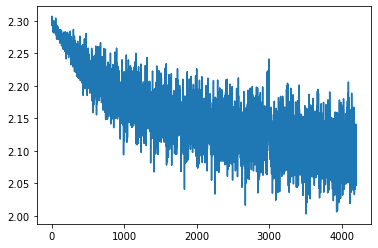

In [141]:
plt.plot(range(len(Loss)),Loss)